<a href="https://colab.research.google.com/github/diyanairab/ST1-Assignment-9_Capstone_project/blob/main/Football_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1 Capstone project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Capstone_project_2024

/content/drive/MyDrive/Capstone_project_2024


In [ ]:
!ls

Australian_Vehicle_Prices.csv  DataForML.pkl		     Final_SVM_Model.pkl  housing.csv
DataForML.pk1		       dataset_football_cleaned.csv  Final_XGB_Model.pkl


# About the project
This project is based on the Football/Football players price prediciton dataset available from the Kaggle website.
https://www.kaggle.com/datasets/ialabISEP/footballsoccer-statistics

The dataset contains price on players participating in each European, Asian or American league.

My project task is to create a machine learning regression model for the dataset to predict the price of football players depending on other factors which might affect the price of a player.

I will approach the problem on a step-by-step basis to perform a data analysis and create the prediction model using various Python libraries/packages.

# Step 1: Reading the dataset

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

#reading the dataset
import pandas as pd
import numpy as np
footballData = pd.read_csv('/content/drive/MyDrive/Capstone_project_2024/dataset_football_cleaned.csv', encoding = 'latin')
print('Shape before deleting duplicate values: ', footballData.shape)

#removing duplicate rows if any
footballData=footballData.drop_duplicates()
print('Shape after deleting duplicate values: ', footballData.shape)

#printing sample data
#start observing the quantitative/categorical/qualitative variables
footballData.head(10)


Shape before deleting duplicate values:  (12711, 44)
Shape after deleting duplicate values:  (11920, 44)


,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,MarlonSilva,NaN,28,Brazil,FirstDivision,AlkiOroklini,0,0,Forward,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,Konstantinou,Stavrinos,21,Cyprus,FirstDivision,AlkiOroklini,0,7,Forward,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,Belameiri,ElHadi,27,Algeria,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,400000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,Acosta,Rafael,29,Venezuela,FirstDivision,AlkiOroklini,0,12,CentralMidfield,200000.0,...,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,0
9,Spoljaric,Matija,21,Cyprus,FirstDivision,AlkiOroklini,0,7,CentralMidfield,500000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


**Observations from step 1:**

*   The file contains data/ price about 11920 players participating in each European, Asian or American league.
*  There is no description for the attributes in the dataset.
*   The 44 attributes in this dataset are the following:
* name
* first_name
* age
* nation
* league
* team
* goals_selection
* selections_nation
* position
* price
* end_contract
* goal_champ
* assist_champ
* own_goal_champ
* sub_on_champ
* sub_out_champ
* yellow_card_champ
* second_yellow_card_champ
* red_card_champ
* penalty_goal_champ
* conceded_goal_champ
* clean_sheet_champ
* goal_cup
* assist_cup
* own_goal_cup
* sub_on_cup
* sub_out_cup
* yellow_card_cup
* second_yellow_card_cup
* red_card_cup
* penalty_goal_cup
* conceded_goal_cup
* clean_sheet_cup
* goal_continent
* assist_continent
* own_goal_continent
* sub_on_continent
* sub_out_continent
* yellow_card_continent
* second_yellow_card_continent
* red_card_continent
* penalty_goal_continent
* conceded_goal_continent
* clean_sheet_continent










# Step 2: Problem Statement Definition


*   Creating a prediction model to predict the price of a football player
*   The target variable is 'price'.
*   The other attributes are the predictors of the target variable.



# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis



*   The idetified target variable for this dataset is continuous
*   Therefore, the appropriate model would be a Machine Learning Regression model



# Step 4: Visualising the distribution of the target variable

11.158301281373406

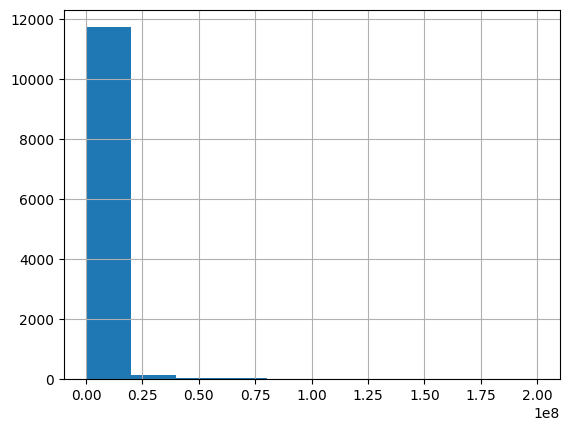

In [ ]:
%matplotlib inline
footballData['price'].hist()
#examining the skewness of the target variable
footballData['price'].skew()

* The target variable is highly positively skewed
* Applying a log transformation to fix the skewness of the data
* Otherwise, the prediction model would be impacted by the skewed data which would lead to incorrect predictions

In [ ]:
#performing a log transform
import numpy as np
footballData['price']=np.log(footballData.price)

0.6710820532211521

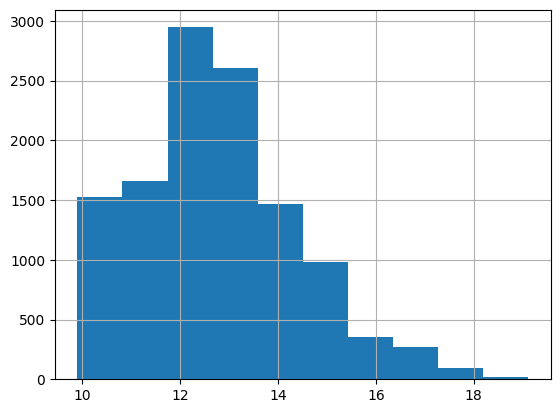

In [ ]:
#observing changes
%matplotlib inline
footballData['price'].hist()
#observing the change in skew
footballData['price'].skew()

**Observations:**

*   Initially, the target variable has a skew of approximately 11.16
*   After performing a log transformation, the skewness was reduced to approximately 0.62
* The data distribution is now satisfactory for further analysis



# Step 5: Basic exploratory data analysis

Looking at the dataset to analyse whether the data is:


*   Quantitative/Qualitative/Categorical
*   Data type

The following would also be observed:


*   Whether there are null values in the dataset
*   Which columns are necessary for the prediction model
*   Examine statistical values to look for outliers in the data


In [ ]:
#looking at the first few rows of the dataset
footballData.head()

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,15.201805,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,13.592367,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,13.384728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,10.819778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,12.206073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#looking at the last few rows of the dataset
footballData.tail()

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,14.115615,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
12707,Soma,Yuki,21,Japan,J1League,NagoyaGrampus,0,0,Midfielder,11.225243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,10.819778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,11.736069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12710,Shibuya,Tsubasa,24,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,11.512925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#displaying all the columns in the dataset
pd.set_option('display.max_columns', None)
footballData

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,15.201805,3.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,237.0,59.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,22.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,13.592367,1.0,6.0,0.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,13.384728,2.0,13.0,4.0,0.0,27.0,11.0,3.0,0.0,0.0,1.0,0.0,0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,10.819778,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,12.206073,NaN,1.0,1.0,0.0,30.0,13.0,3.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,14.115615,2.0,8.0,14.0,0.0,19.0,47.0,63.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
12707,Soma,Yuki,21,Japan,J1League,NagoyaGrampus,0,0,Midfielder,11.225243,NaN,1.0,3.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,10.819778,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,11.736069,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,138.0,21.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#examing the information about the dataset
footballData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11920 entries, 0 to 12710
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11920 non-null  object 
 1   first_name                    10911 non-null  object 
 2   age                           11920 non-null  int64  
 3   nation                        11920 non-null  object 
 4   league                        11920 non-null  object 
 5   team                          11920 non-null  object 
 6   goals_selection               11920 non-null  int64  
 7   selections_nation             11920 non-null  int64  
 8   position                      11920 non-null  object 
 9   price                         11920 non-null  float64
 10  end_contract                  7958 non-null   float64
 11  goal_champ                    11920 non-null  float64
 12  assist_champ                  11920 non-null  float64
 13  own_go

In [ ]:
#examining the statistical values of the dataset
footballData.describe(include='all')

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
count,11920,10911,11920.000000,11920,11920,11920,11920.000000,11920.000000,11920,11920.000000,7958.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.0,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.0,11920.0,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.0,11920.0
unique,9202,4610,NaN,167,74,1057,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RodrÃ­guez,Daniel,NaN,Brazil,PremierLeague,Nacional,NaN,NaN,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,76,NaN,847,686,32,NaN,NaN,2319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.082634,NaN,NaN,NaN,0.624413,5.954782,NaN,12.802197,2.069364,12.169547,9.487332,0.102601,22.359312,27.223322,15.341275,0.435319,0.421560,24.962836,6.287836,0.0,0.915688,0.730453,0.017869,1.626762,1.844883,0.880872,0.030453,1.393624,0.462164,0.0,0.0,0.540940,0.512584,0.009144,1.146896,1.266359,0.658389,1.004446,0.255369,0.040772,0.0,0.0
std,NaN,NaN,4.579669,NaN,NaN,NaN,2.687104,15.153029,NaN,1.574255,1.161774,19.571263,15.496146,0.365874,23.999259,32.068328,18.229521,0.930784,0.835725,74.569662,20.816256,0.0,2.323278,1.939580,0.142254,3.114862,3.534759,2.030451,0.181802,6.051594,1.865719,0.0,0.0,2.450107,1.983025,0.102818,2.854849,3.582210,2.042401,6.324136,1.861526,0.346883,0.0,0.0
min,NaN,NaN,16.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,9.903488,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,NaN,NaN,23.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,11.736069,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,NaN,NaN,26.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,12.611538,2.000000,4.000000,3.000000,0.000000,15.000000,16.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,NaN,NaN,29.000000,NaN,NaN,NaN,0.000000,4.000000,NaN,13.592367,3.000000,17.000000,13.000000,0.000000,35.000000,42.000000,22.000000,1.000000,1.000000,4.000000,0.000000,0.0,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
#looking at the number of unique values in each column
footballData.nunique()

name                            9202
first_name                      4610
age                               29
nation                           167
league                            74
team                            1057
goals_selection                   41
selections_nation                135
position                          12
price                            132
end_contract                       8
goal_champ                       141
assist_champ                     122
own_goal_champ                     6
sub_on_champ                     142
sub_out_champ                    186
yellow_card_champ                122
second_yellow_card_champ          10
red_card_champ                     9
penalty_goal_champ               448
conceded_goal_champ              164
clean_sheet_champ                  1
goal_cup                          29
assist_cup                        25
own_goal_cup                       4
sub_on_cup                        32
sub_out_cup                       38
y

**Observations from step 5:**

* name - Qualitative. Not selected                         
* first_name - Qualitative.Not selected
* age - Continuous. Selected
* nation - Qualitative. Not selected
* league - Qualitative. Not selected
* team - Qualitative. Not selected
* goals_selection - Continuous. Selected
* selections_nation - Continuous. Selected
* position - Categorical. Selected
* price - Continuous. Selected
* end_contract - Categorical. Selected
* goal_champ - Continuous. Selected
* assist_champ - Continuous. Selected
* own_goal_champ - Categorical. Selected
* sub_on_champ - Continuous. Selected
* sub_out_champ - Continuous. Selected
* yellow_card_champ - Continuous. Selected
* second_yellow_card_champ - Categorical. Selected
* red_card_champ - Categorical. Selected
* penalty_goal_champ - Continuous. Selected
* conceded_goal_champ - Continuous. Selected
* clean_sheet_champ - Categorical. Not selected. There is only one value in the column and is therefor, unlikely to affect the target variable.
* goal_cup - Continuous. Selected
* assist_cup - Continuous. Selected
* own_goal_cup - Categorical. Selected
* sub_on_cup - Continuous. Selected
* sub_out_cup - Continuous. Selected
* yellow_card_cup - Continuous. Selected
* second_yellow_card_cup - Categorical. Selected
* red_card_cup - Continuous. Selected
* penalty_goal_cup - Continuous. Selected
* conceded_goal_cup - Categorical. Not selected. There is only one value in the column and is therefor, unlikely to affect the target variable.
* clean_sheet_cup - Categorical. Not selected. There is only one value in the column and is therefor, unlikely to affect the target variable.
* goal_continent - Continuous. Selected
* assist_continent - Continuous. Selected
* own_goal_continent - Categorical. Selected
* sub_on_continent - Continuous. Selected
* sub_out_continent - Continuous. Selected
* yellow_card_continent - Continuous. Selected
* second_yellow_card_continent - Continuous. Selected
* red_card_continent - Continuous. Selected
* penalty_goal_continent - Categorical. Selected
* conceded_goal_continent - Categorical. Not selected. There is only one value in the column and is therefor, unlikely to affect the target variable.
* clean_sheet_continent - Categorical. Not selected. There is only one value in the column and is therefor, unlikely to affect the target variable.

The selected columns will be further analysed to determine the final selection for machine learning regression model building.

The columns that are not selected would be rejected.

# Step 6: Removing unwanted columns

The following columns are removed:
* name
* first_name
* nation
* league
* team
* clean_sheet_champ
* conceded_goal_cup
* clean_sheet_cup
* conceded_goal_continent
* clean_sheet_continent

In [ ]:
#removing the qualitative columns
#also removing the columns with only one value as they wouldn't change the value of price
footballData.drop(columns=['name','first_name','nation','league','team',
                           'clean_sheet_champ','conceded_goal_cup','clean_sheet_cup','conceded_goal_continent',
                           'clean_sheet_continent'],inplace=True)
footballData.shape

(11920, 34)

# Step 7: Visual exploratory data analysis

Visualising the distribution of the identified categorical variables in the dataset.
The categorical variable are the following:
* position
* end_contract
* own_goal_champ
* second_yellow_card_champ
* red_card_champ
* own_goal_cup
* second_yellow_card_cup
* own_goal_continent
* penalty_goal_continent

In [ ]:
#defining a function for plotting a barchart

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  #generating multiple subplots
  fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle("Bar charts of:" + str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

In [ ]:
#creating a list of all categorical variable just for easy reference
#not used anywhere in the code
categorical = ['position', 'end_contract', 'own_goal_champ',
               'second_yellow_card_champ', 'red_card_champ', 'own_goal_cup',
               'second_yellow_card_cup','own_goal_continent','penalty_goal_continent']

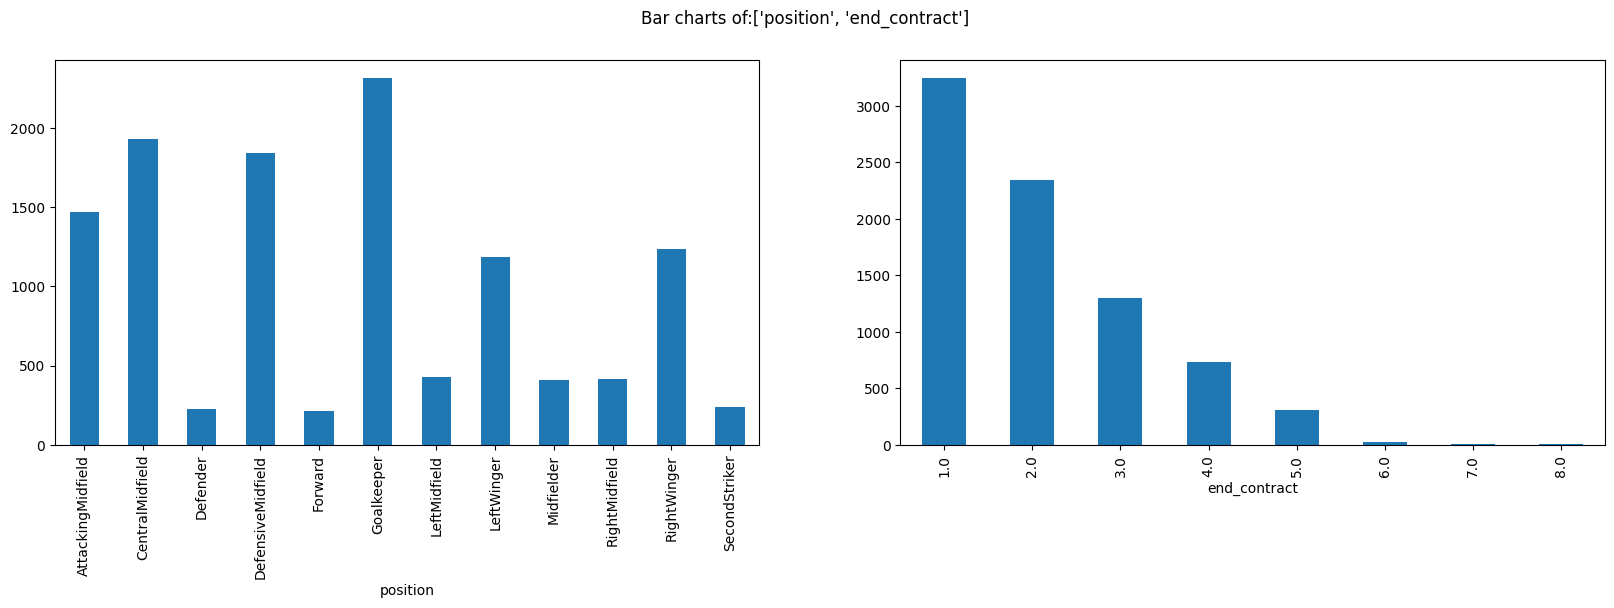

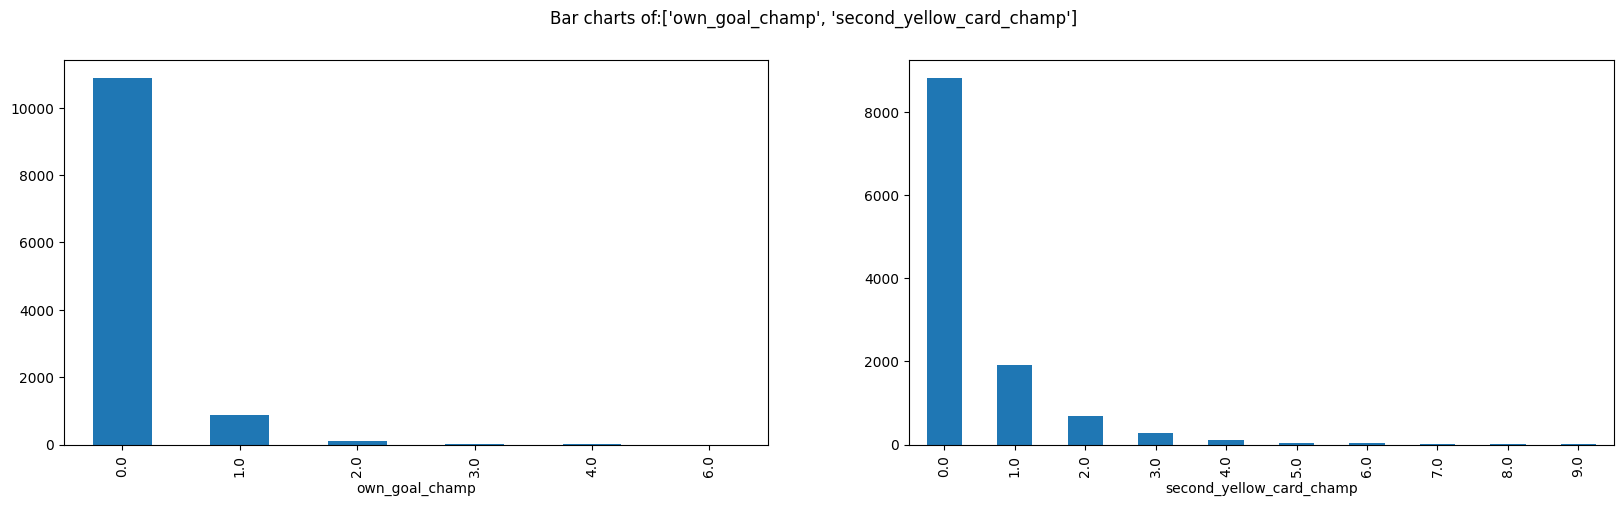

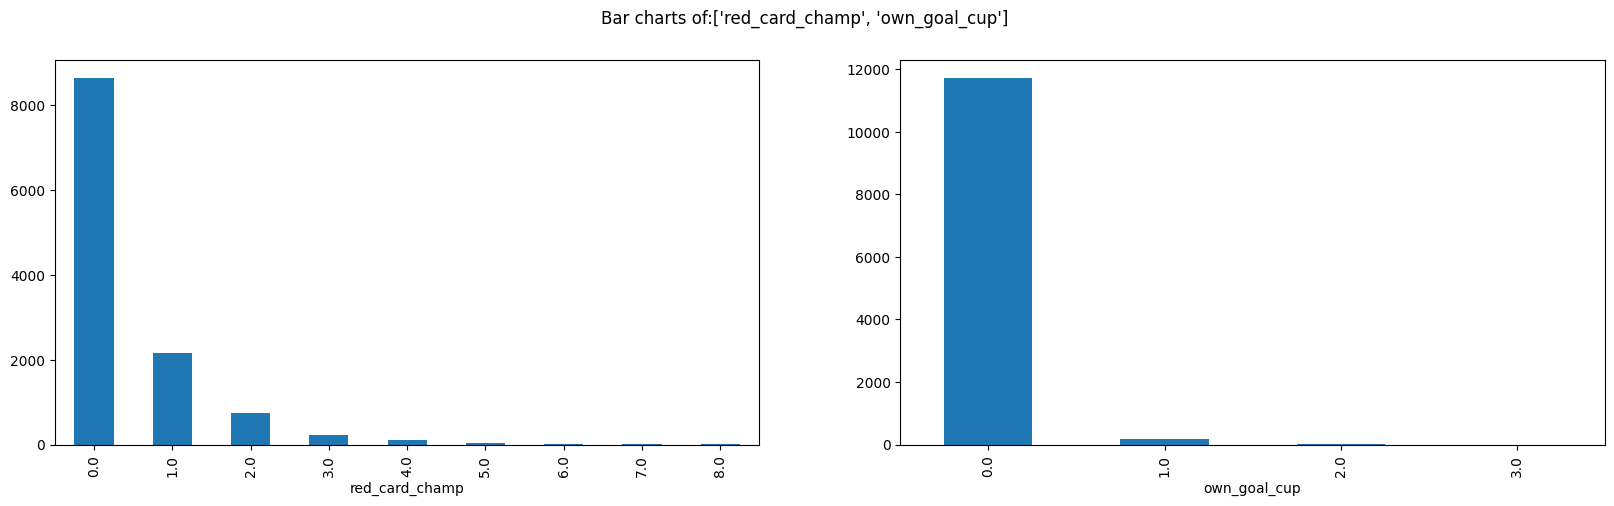

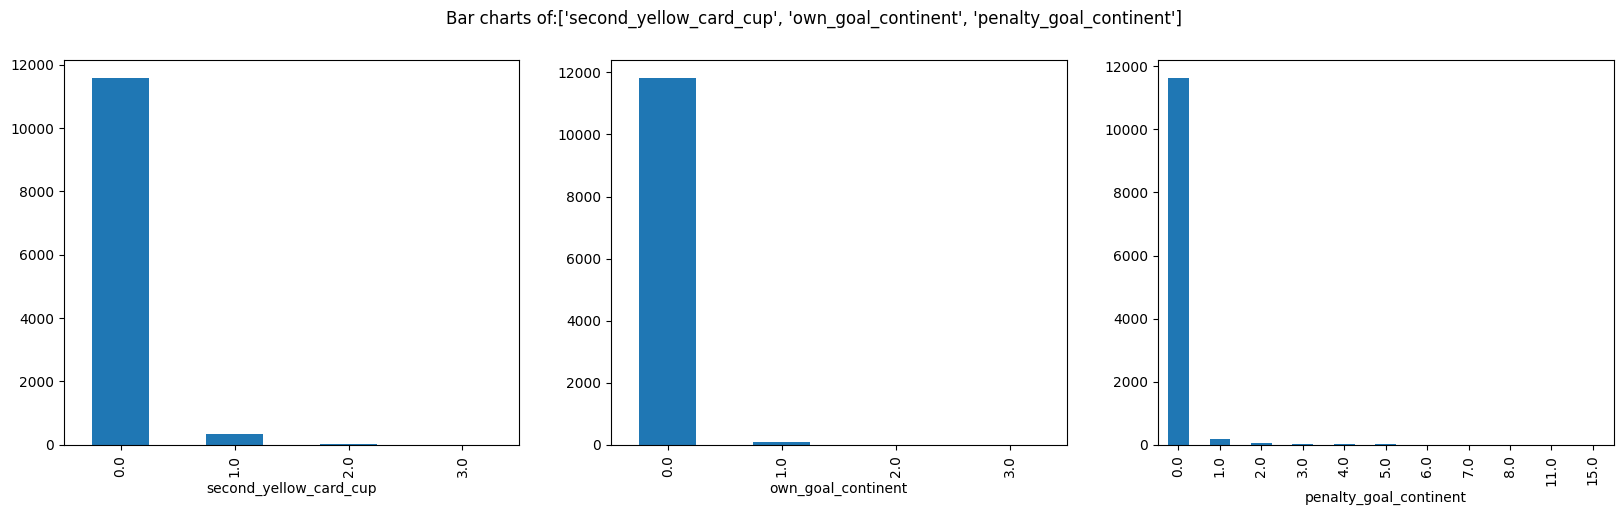

In [ ]:
#plotting bar charts using the function defined above
PlotBarCharts(inpData=footballData, colsToPlot=['position', 'end_contract'])
PlotBarCharts(inpData=footballData, colsToPlot=['own_goal_champ', 'second_yellow_card_champ'])
PlotBarCharts(inpData=footballData, colsToPlot=['red_card_champ', 'own_goal_cup'])
PlotBarCharts(inpData=footballData, colsToPlot=['second_yellow_card_cup', 'own_goal_continent','penalty_goal_continent'])

**Observations:**
* position - Good distribution. Selected
* end_contract - Good distribution. Selected
* own_goal_champ - Good distribution. Selected
* second_yellow_card_champ - Good distribution. Selected
* red_card_champ - Good distribution. Selected
* own_goal_cup - One bar is dominating. Selected
* second_yellow_card_cup - One bar is dominating. Selected
* own_goal_continent - One bar is dominating. Selected
* penalty_goal_continent - One bar is dominating. Selected

Since there was no desciption given for the attributes in the dataset, none of the columns cannot be rejected without further analysis. Hence, all the categorical predictors are selected for further analysis.



# Step 8: Visualisation of all continuous predictors

The continuous predictors are:

* age
* goals_selection
* selections_nation
* goal_champ
* assist_champ
* sub_on_champ
* sub_out_champ
* yellow_card_champ
* penalty_goal_champ
* conceded_goal_champ
* goal_cup
* assist_cup
* sub_out_cup
* yellow_card_cup
* red_card_cup
* penalty_goal_cup
* goal_continent
* assist_continent
* sub_on_continent
* sub_out_continent
* yellow_card_continent
* second_yellow_card_continent
* red_card_continent

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'goals_selection'}>,
        <Axes: title={'center': 'selections_nation'}>,
        <Axes: title={'center': 'goal_champ'}>,
        <Axes: title={'center': 'assist_champ'}>],
       [<Axes: title={'center': 'sub_on_champ'}>,
        <Axes: title={'center': 'sub_out_champ'}>,
        <Axes: title={'center': 'yellow_card_champ'}>,
        <Axes: title={'center': 'penalty_goal_champ'}>,
        <Axes: title={'center': 'conceded_goal_champ'}>],
       [<Axes: title={'center': 'goal_cup'}>,
        <Axes: title={'center': 'assist_cup'}>,
        <Axes: title={'center': 'sub_on_cup'}>,
        <Axes: title={'center': 'sub_out_cup'}>,
        <Axes: title={'center': 'yellow_card_cup'}>],
       [<Axes: title={'center': 'red_card_cup'}>,
        <Axes: title={'center': 'penalty_goal_cup'}>,
        <Axes: title={'center': 'goal_continent'}>,
        <Axes: title={'center': 'assist_continent'}>,
        <Axes: title={'cent

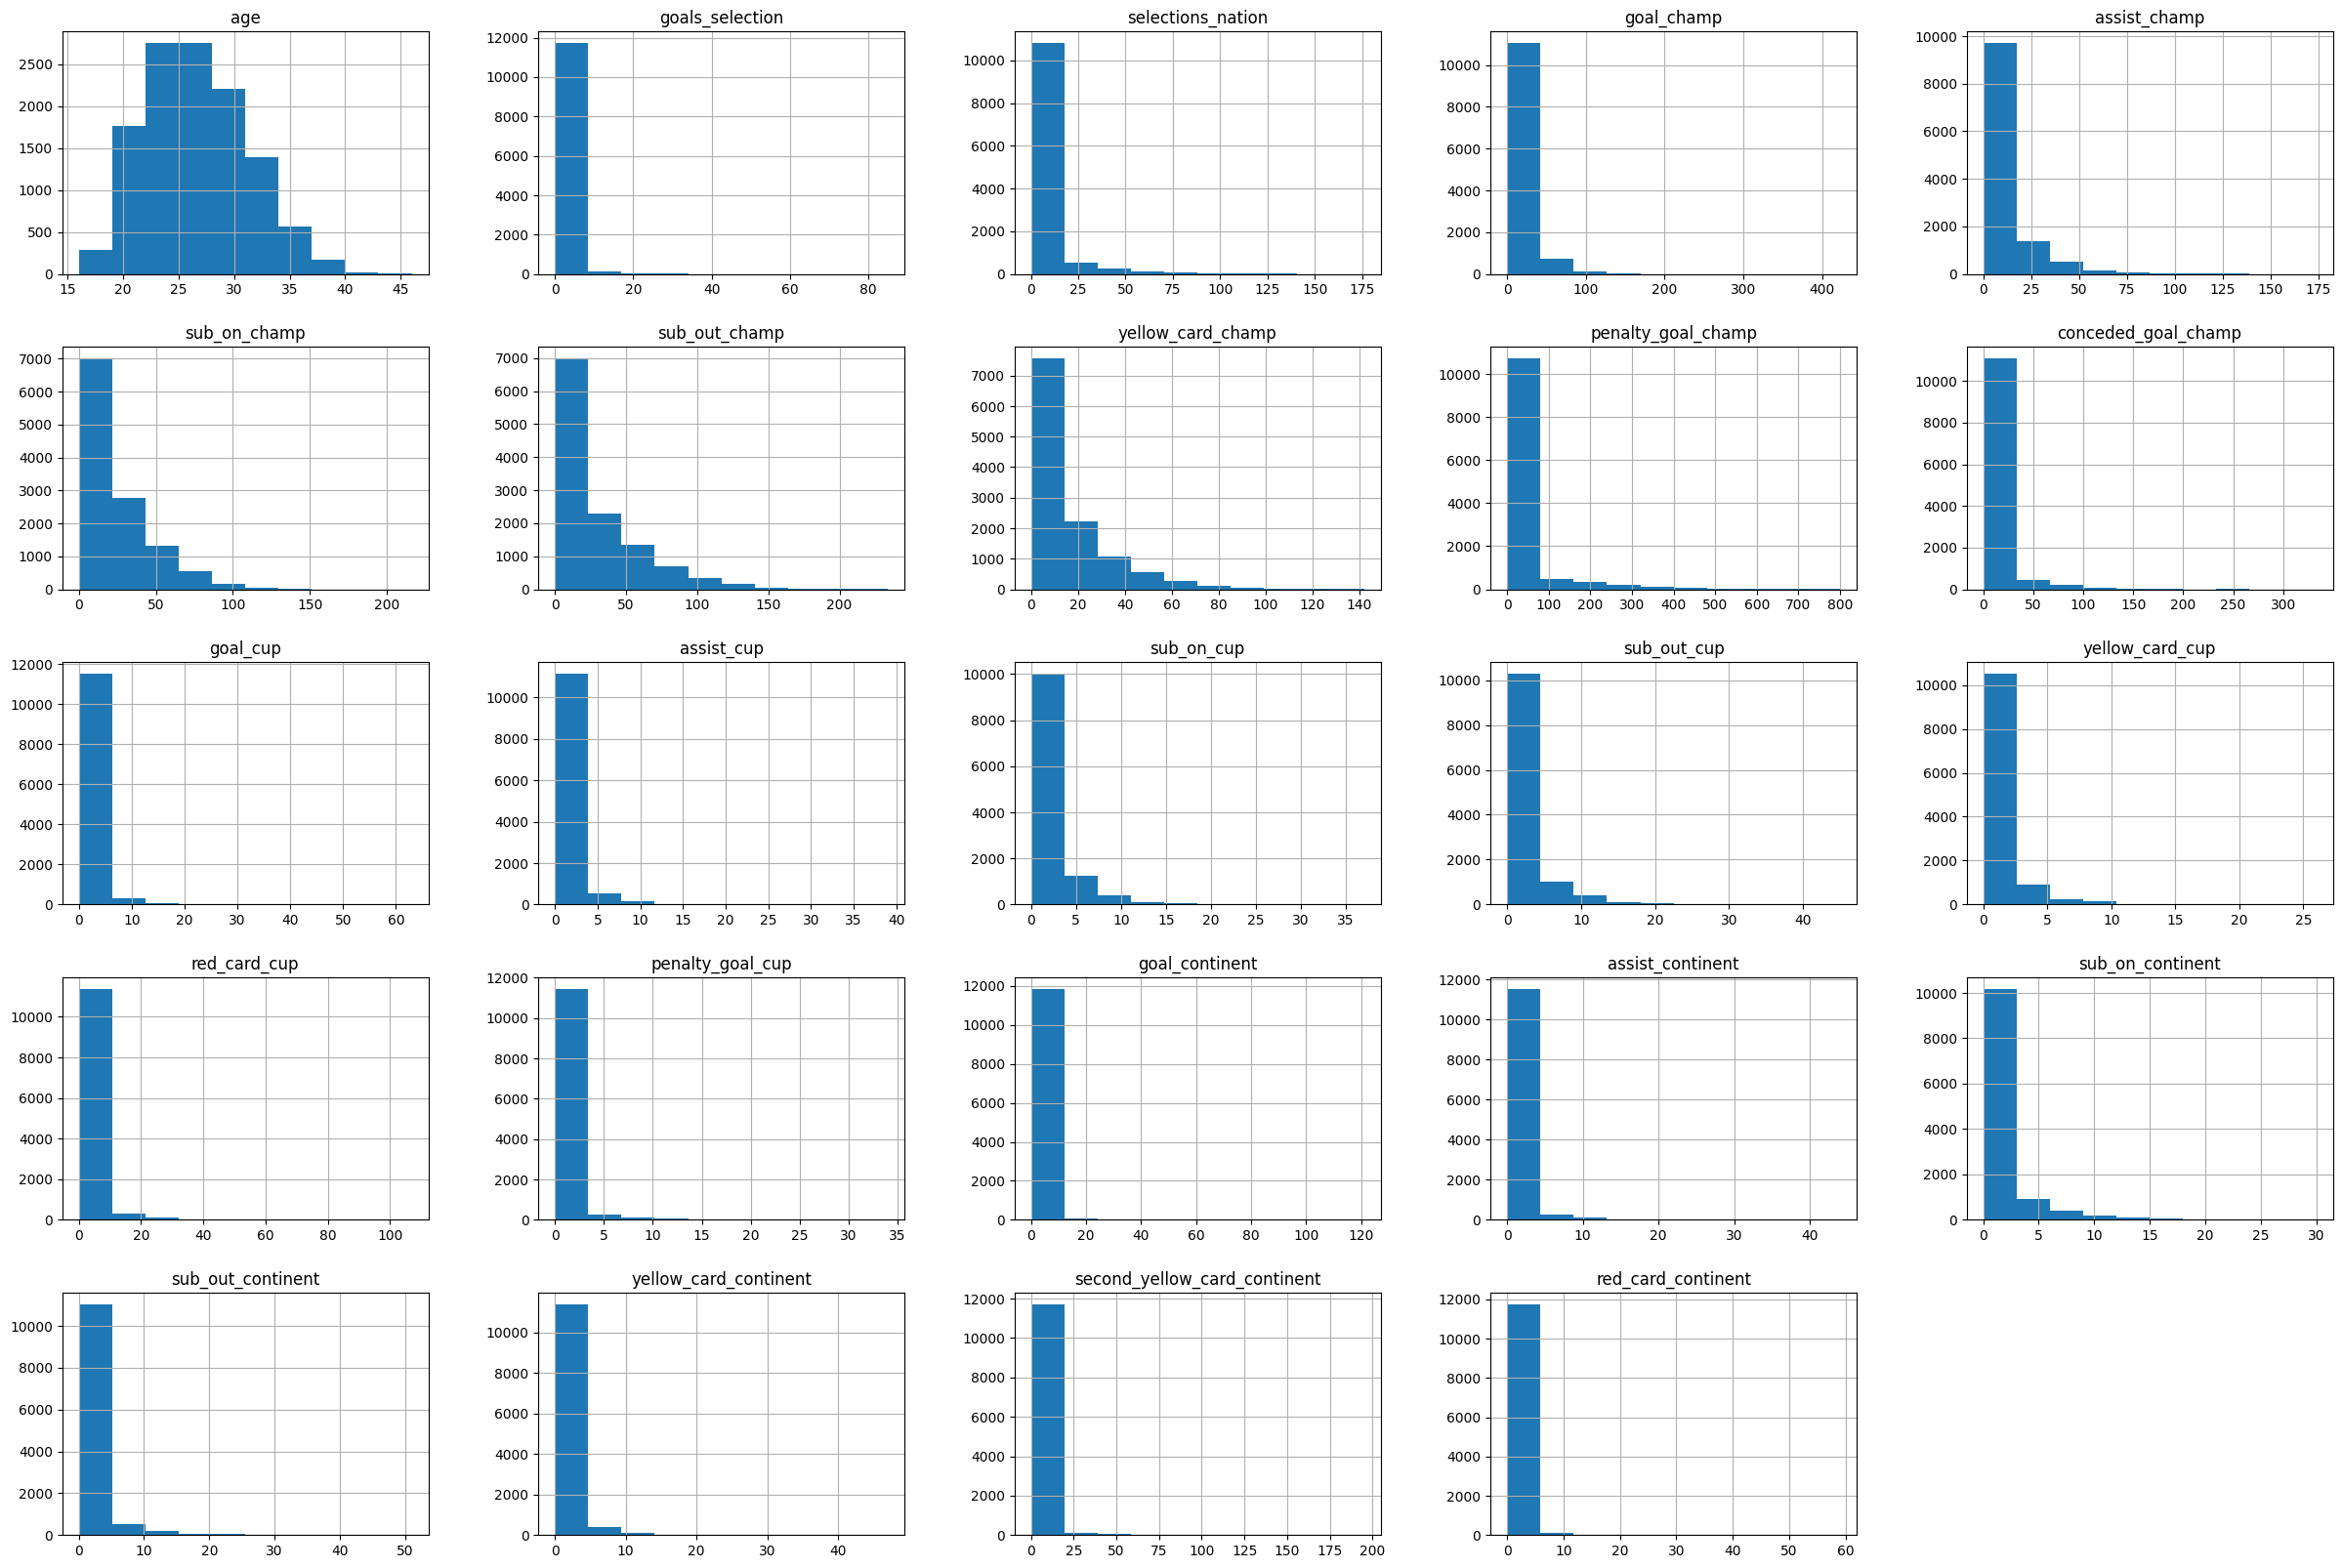

In [ ]:
#plotting a histogram of all continuous predictors
footballData.hist(['age','goals_selection','selections_nation',
                  'goal_champ','assist_champ','sub_on_champ','sub_out_champ',
                  'yellow_card_champ','penalty_goal_champ','conceded_goal_champ',
                  'goal_cup','assist_cup','sub_on_cup','sub_out_cup',
                  'yellow_card_cup','red_card_cup','penalty_goal_cup',
                  'goal_continent','assist_continent','sub_on_continent',
                  'sub_out_continent','yellow_card_continent','second_yellow_card_continent',
                  'red_card_continent'],figsize=[30,20])

**Observations**:

* age - selected, good distribution
* goals_selection - selected, skewed distribution
* selections_nation - selected, skewed distribution
* goal_champ - selected, skewed distribution
* assist_champ - selected, skewed distribution
* sub_on_champ - selected, good distribution
* sub_out_champ - selected, good distribution
* yellow_card_champ - selected, good distribution
* penalty_goal_champ - selected, skewed distribution
* conceded_goal_champ - selected, skewed distribution
* goal_cup - selected, skewed distribution
* assist_cup - selected, skewed distribution
* sub_on_cup - selected, skewed distribution
* sub_out_cup - selected, skewed distribution
* yellow_card_cup - selected, skewed distribution
* red_card_cup - selected, skewed distribution
* penalty_goal_cup - selected, skewed distribution
* goal_continent - selected, skewed distribution
* assist_continent - selected, skewed distribution
* sub_on_continent - selected, skewed distribution
* sub_out_continent - selected, skewed distribution
* yellow_card_continent - selected, skewed distribution
* second_yellow_card_continent - selected, skewed distribution
* red_card_continent - selected, skewed distribution

All the columns are selected for now. However, the columns with a skewed distribution might have outliers and would require outlier treatment.

# Step 9: Outlier analysis

The following attributes had extremely skewed positive distributions:


* goals_selection
* selections_nation
* goal_champ
* assist_champ
* penalty_goal_champ
* conceded_goal_champ
* goal_cup
* assist_cup
* sub_on_cup
* sub_out_cup
* yellow_card_cup
* red_card_cup
* penalty_goal_cup
* goal_continent
* assist_continent
* sub_on_continent
* sub_out_continent
* yellow_card_continent
* second_yellow_card_continent
* red_card_continent

These attributes are examined for outliers. The outliers are then replaced with another logical value.

In [ ]:
#Replacing outliers for 'goals_selection'
# Finding nearest values to 5 mark
footballData['goals_selection'][footballData['goals_selection']<5].sort_values(ascending=False)

4563     4
8207     4
3461     4
2021     4
535      4
        ..
4517     0
4518     0
4520     0
4521     0
12710    0
Name: goals_selection, Length: 11488, dtype: int64

In [ ]:
# Replacing outliers with nearest possibe value for the goals_selection column
footballData['goals_selection'][footballData['goals_selection']>5] =4

In [ ]:
#Replacing outliers for 'selections_nation'
# Finding nearest values to 50 mark
footballData['selections_nation'][footballData['selections_nation']<50].sort_values(ascending=False)

347      49
5673     49
746      49
303      49
3635     49
         ..
6251      0
6248      0
6247      0
6235      0
12710     0
Name: selections_nation, Length: 11577, dtype: int64

In [ ]:
# Replacing outliers with nearest possibe value 'selections_nation'
footballData['selections_nation'][footballData['selections_nation']>50] =49

In [ ]:
#Replacing outliers for 'goal_champ'
# Finding nearest values to 100 mark
footballData['goal_champ'][footballData['goal_champ']<100].sort_values(ascending=False)

4741     99.0
5946     99.0
694      99.0
12535    98.0
789      98.0
         ... 
6822      0.0
6821      0.0
6814      0.0
6813      0.0
12710     0.0
Name: goal_champ, Length: 11856, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the goal_champ column
footballData['goal_champ'][footballData['goal_champ']>100] =99

In [ ]:
#Replacing outliers for 'assist_champ'
# Finding nearest values to 100 mark
footballData['assist_champ'][footballData['assist_champ']<100].sort_values(ascending=False)

9504     99.0
4506     98.0
12203    98.0
7614     98.0
12678    97.0
         ... 
6724      0.0
6723      0.0
6720      0.0
6714      0.0
12710     0.0
Name: assist_champ, Length: 11890, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the assist_champ column
footballData['assist_champ'][footballData['assist_champ']>100] =99

In [ ]:
#Replacing outliers for 'penalty_goal_champ'
# Finding nearest values to 250 mark
footballData['penalty_goal_champ'][footballData['penalty_goal_champ']<250].sort_values(ascending=False)

2700    249.0
4056    249.0
2040    248.0
8914    248.0
2597    248.0
        ...  
6042      0.0
6041      0.0
6040      0.0
6039      0.0
6185      0.0
Name: penalty_goal_champ, Length: 11557, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the penalty_goal_champ column
footballData['penalty_goal_champ'][footballData['penalty_goal_champ']>250] =249

In [ ]:
#Replacing outliers for 'conceded_goal_champ'
# Finding nearest values to 100 mark
footballData['conceded_goal_champ'][footballData['conceded_goal_champ']<100].sort_values(ascending=False)

3427    99.0
4577    99.0
8243    99.0
3908    99.0
1877    99.0
        ... 
5015     0.0
5016     0.0
5017     0.0
5018     0.0
6136     0.0
Name: conceded_goal_champ, Length: 11776, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the conceded_goal_champ column
footballData['conceded_goal_champ'][footballData['conceded_goal_champ']>100] =99

In [ ]:
#Replacing outliers for 'goal_cup'
# Finding nearest values to 5 mark
footballData['goal_cup'][footballData['goal_cup']<5].sort_values(ascending=False)

3518     4.0
12375    4.0
1908     4.0
3554     4.0
12388    4.0
        ... 
4970     0.0
4971     0.0
4972     0.0
4973     0.0
12710    0.0
Name: goal_cup, Length: 11187, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the goal_cup column
footballData['goal_cup'][footballData['goal_cup']>5] =4

In [ ]:
#Replacing outliers for 'assist_cup'
# Finding nearest values to 7 mark
footballData['assist_cup'][footballData['assist_cup']<7].sort_values(ascending=False)

299      6.0
1624     6.0
8234     6.0
190      6.0
3418     6.0
        ... 
4890     0.0
4891     0.0
4892     0.0
4893     0.0
12710    0.0
Name: assist_cup, Length: 11635, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the assist_cup column
footballData['assist_cup'][footballData['assist_cup']>7] =6

In [ ]:
#Replacing outliers for 'sub_on_cup'
# Finding nearest values to 12 mark
footballData['sub_on_cup'][footballData['sub_on_cup']<12].sort_values(ascending=False)

1052     11.0
3553     11.0
6937     11.0
8891     11.0
1989     11.0
         ... 
5559      0.0
5557      0.0
5556      0.0
5554      0.0
12710     0.0
Name: sub_on_cup, Length: 11680, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the sub_on_cup column
footballData['sub_on_cup'][footballData['sub_on_cup']>12] =11

In [ ]:
#Replacing outliers for 'sub_out_cup'
# Finding nearest values to 12 mark
footballData['sub_out_cup'][footballData['sub_out_cup']<12].sort_values(ascending=False)

3913     11.0
3642     11.0
4220     11.0
3184     11.0
9498     11.0
         ... 
5685      0.0
5684      0.0
5683      0.0
5682      0.0
12710     0.0
Name: sub_out_cup, Length: 11600, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the sub_out_cup column
footballData['sub_out_cup'][footballData['sub_out_cup']>12] =11

In [ ]:
#Replacing outliers for 'yellow_card_cup'
# Finding nearest values to 5 mark
footballData['yellow_card_cup'][footballData['yellow_card_cup']<5].sort_values(ascending=False)

7477     4.0
6599     4.0
8367     4.0
3858     4.0
11324    4.0
        ... 
5007     0.0
5008     0.0
5009     0.0
5010     0.0
12710    0.0
Name: yellow_card_cup, Length: 11268, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the yellow_card_cup column
footballData['yellow_card_cup'][footballData['yellow_card_cup']>5] =4

In [ ]:
#Replacing outliers for 'red_card_cup'
# Finding nearest values to 20 mark
footballData['red_card_cup'][footballData['red_card_cup']<20].sort_values(ascending=False)

8635    19.0
3366    19.0
7760    19.0
3397    19.0
1987    19.0
        ... 
4253     0.0
4254     0.0
4255     0.0
4256     0.0
6134     0.0
Name: red_card_cup, Length: 11647, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the red_card_cup column
footballData['red_card_cup'][footballData['red_card_cup']>20] =19

In [ ]:
#Replacing outliers for 'penalty_goal_cup'
# Finding nearest values to 20 mark
footballData['penalty_goal_cup'][footballData['penalty_goal_cup']<7].sort_values(ascending=False)

542     6.0
4718    6.0
8562    6.0
1782    6.0
121     6.0
       ... 
4625    0.0
391     0.0
4627    0.0
4628    0.0
6132    0.0
Name: penalty_goal_cup, Length: 11682, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the penalty_goal_cup column
footballData['penalty_goal_cup'][footballData['penalty_goal_cup']>7] =6

In [ ]:
#Replacing outliers for 'goal_continent'
# Finding nearest values to 10 mark
footballData['goal_continent'][footballData['goal_continent']<10].sort_values(ascending=False)

4745     9.0
1598     9.0
697      9.0
9432     9.0
3802     9.0
        ... 
4469     0.0
4470     0.0
4471     0.0
4472     0.0
12710    0.0
Name: goal_continent, Length: 11798, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the goal_continent column
footballData['goal_continent'][footballData['goal_continent']>10] =9

In [ ]:
#Replacing outliers for 'assist_continent'
# Finding nearest values to 8 mark
footballData['assist_continent'][footballData['assist_continent']<8].sort_values(ascending=False)

240      7.0
4744     7.0
538      7.0
4515     7.0
4117     7.0
        ... 
4464     0.0
4465     0.0
4467     0.0
4468     0.0
12710    0.0
Name: assist_continent, Length: 11743, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the assist_continent column
footballData['assist_continent'][footballData['assist_continent']>8] =7

In [ ]:
#Replacing outliers for 'sub_on_continent'
# Finding nearest values to 10 mark
footballData['sub_on_continent'][footballData['sub_on_continent']<10].sort_values(ascending=False)

3063     9.0
4422     9.0
8669     9.0
4220     9.0
9277     9.0
        ... 
5007     0.0
5008     0.0
5009     0.0
5010     0.0
12710    0.0
Name: sub_on_continent, Length: 11578, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the sub_on_continent column
footballData['sub_on_continent'][footballData['sub_on_continent']>10] =9

In [ ]:
#Replacing outliers for 'sub_out_continent'
# Finding nearest values to 10 mark
footballData['sub_out_continent'][footballData['sub_out_continent']<10].sort_values(ascending=False)

12505    9.0
2944     9.0
8965     9.0
4322     9.0
12402    9.0
        ... 
4885     0.0
4886     0.0
4887     0.0
4889     0.0
12710    0.0
Name: sub_out_continent, Length: 11491, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the sub_out_continent column
footballData['sub_out_continent'][footballData['sub_out_continent']>10] =9

In [ ]:
#Replacing outliers for 'yellow_card_continent'
# Finding nearest values to 9 mark
footballData['yellow_card_continent'][footballData['yellow_card_continent']<9].sort_values(ascending=False)

343      8.0
12056    8.0
4447     8.0
1470     8.0
62       8.0
        ... 
4704     0.0
4705     0.0
4706     0.0
4707     0.0
12710    0.0
Name: yellow_card_continent, Length: 11747, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the yellow_card_continent column
footballData['yellow_card_continent'][footballData['yellow_card_continent']>9] =8

In [ ]:
#Replacing outliers for 'second_yellow_card_continent'
# Finding nearest values to 20 mark
footballData['second_yellow_card_continent'][footballData['second_yellow_card_continent']<20].sort_values(ascending=False)

4475     19.0
8825     19.0
3781     19.0
7889     19.0
11883    19.0
         ... 
4178      0.0
4179      0.0
4180      0.0
4181      0.0
12710     0.0
Name: second_yellow_card_continent, Length: 11715, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the second_yellow_card_continent column
footballData['second_yellow_card_continent'][footballData['second_yellow_card_continent']>20] =19

In [ ]:
#Replacing outliers for 'red_card_continent'
# Finding nearest values to 5 mark
footballData['red_card_continent'][footballData['red_card_continent']<5].sort_values(ascending=False)

4171     4.0
12518    4.0
4399     4.0
1311     4.0
4387     4.0
        ... 
4119     0.0
4120     0.0
4121     0.0
4122     0.0
12710    0.0
Name: red_card_continent, Length: 11732, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value for the red_card_continent column
footballData['red_card_continent'][footballData['red_card_continent']>5] =4

# Step 11: Visualising data distribution after outlier removal


array([[<Axes: title={'center': 'goals_selection'}>,
        <Axes: title={'center': 'selections_nation'}>,
        <Axes: title={'center': 'goal_champ'}>,
        <Axes: title={'center': 'assist_champ'}>],
       [<Axes: title={'center': 'penalty_goal_champ'}>,
        <Axes: title={'center': 'conceded_goal_champ'}>,
        <Axes: title={'center': 'goal_cup'}>,
        <Axes: title={'center': 'assist_cup'}>],
       [<Axes: title={'center': 'sub_on_cup'}>,
        <Axes: title={'center': 'sub_out_cup'}>,
        <Axes: title={'center': 'yellow_card_cup'}>,
        <Axes: title={'center': 'red_card_cup'}>],
       [<Axes: title={'center': 'penalty_goal_cup'}>,
        <Axes: title={'center': 'goal_continent'}>,
        <Axes: title={'center': 'assist_continent'}>,
        <Axes: title={'center': 'sub_on_continent'}>],
       [<Axes: title={'center': 'sub_out_continent'}>,
        <Axes: title={'center': 'yellow_card_continent'}>,
        <Axes: title={'center': 'second_yellow_card_con

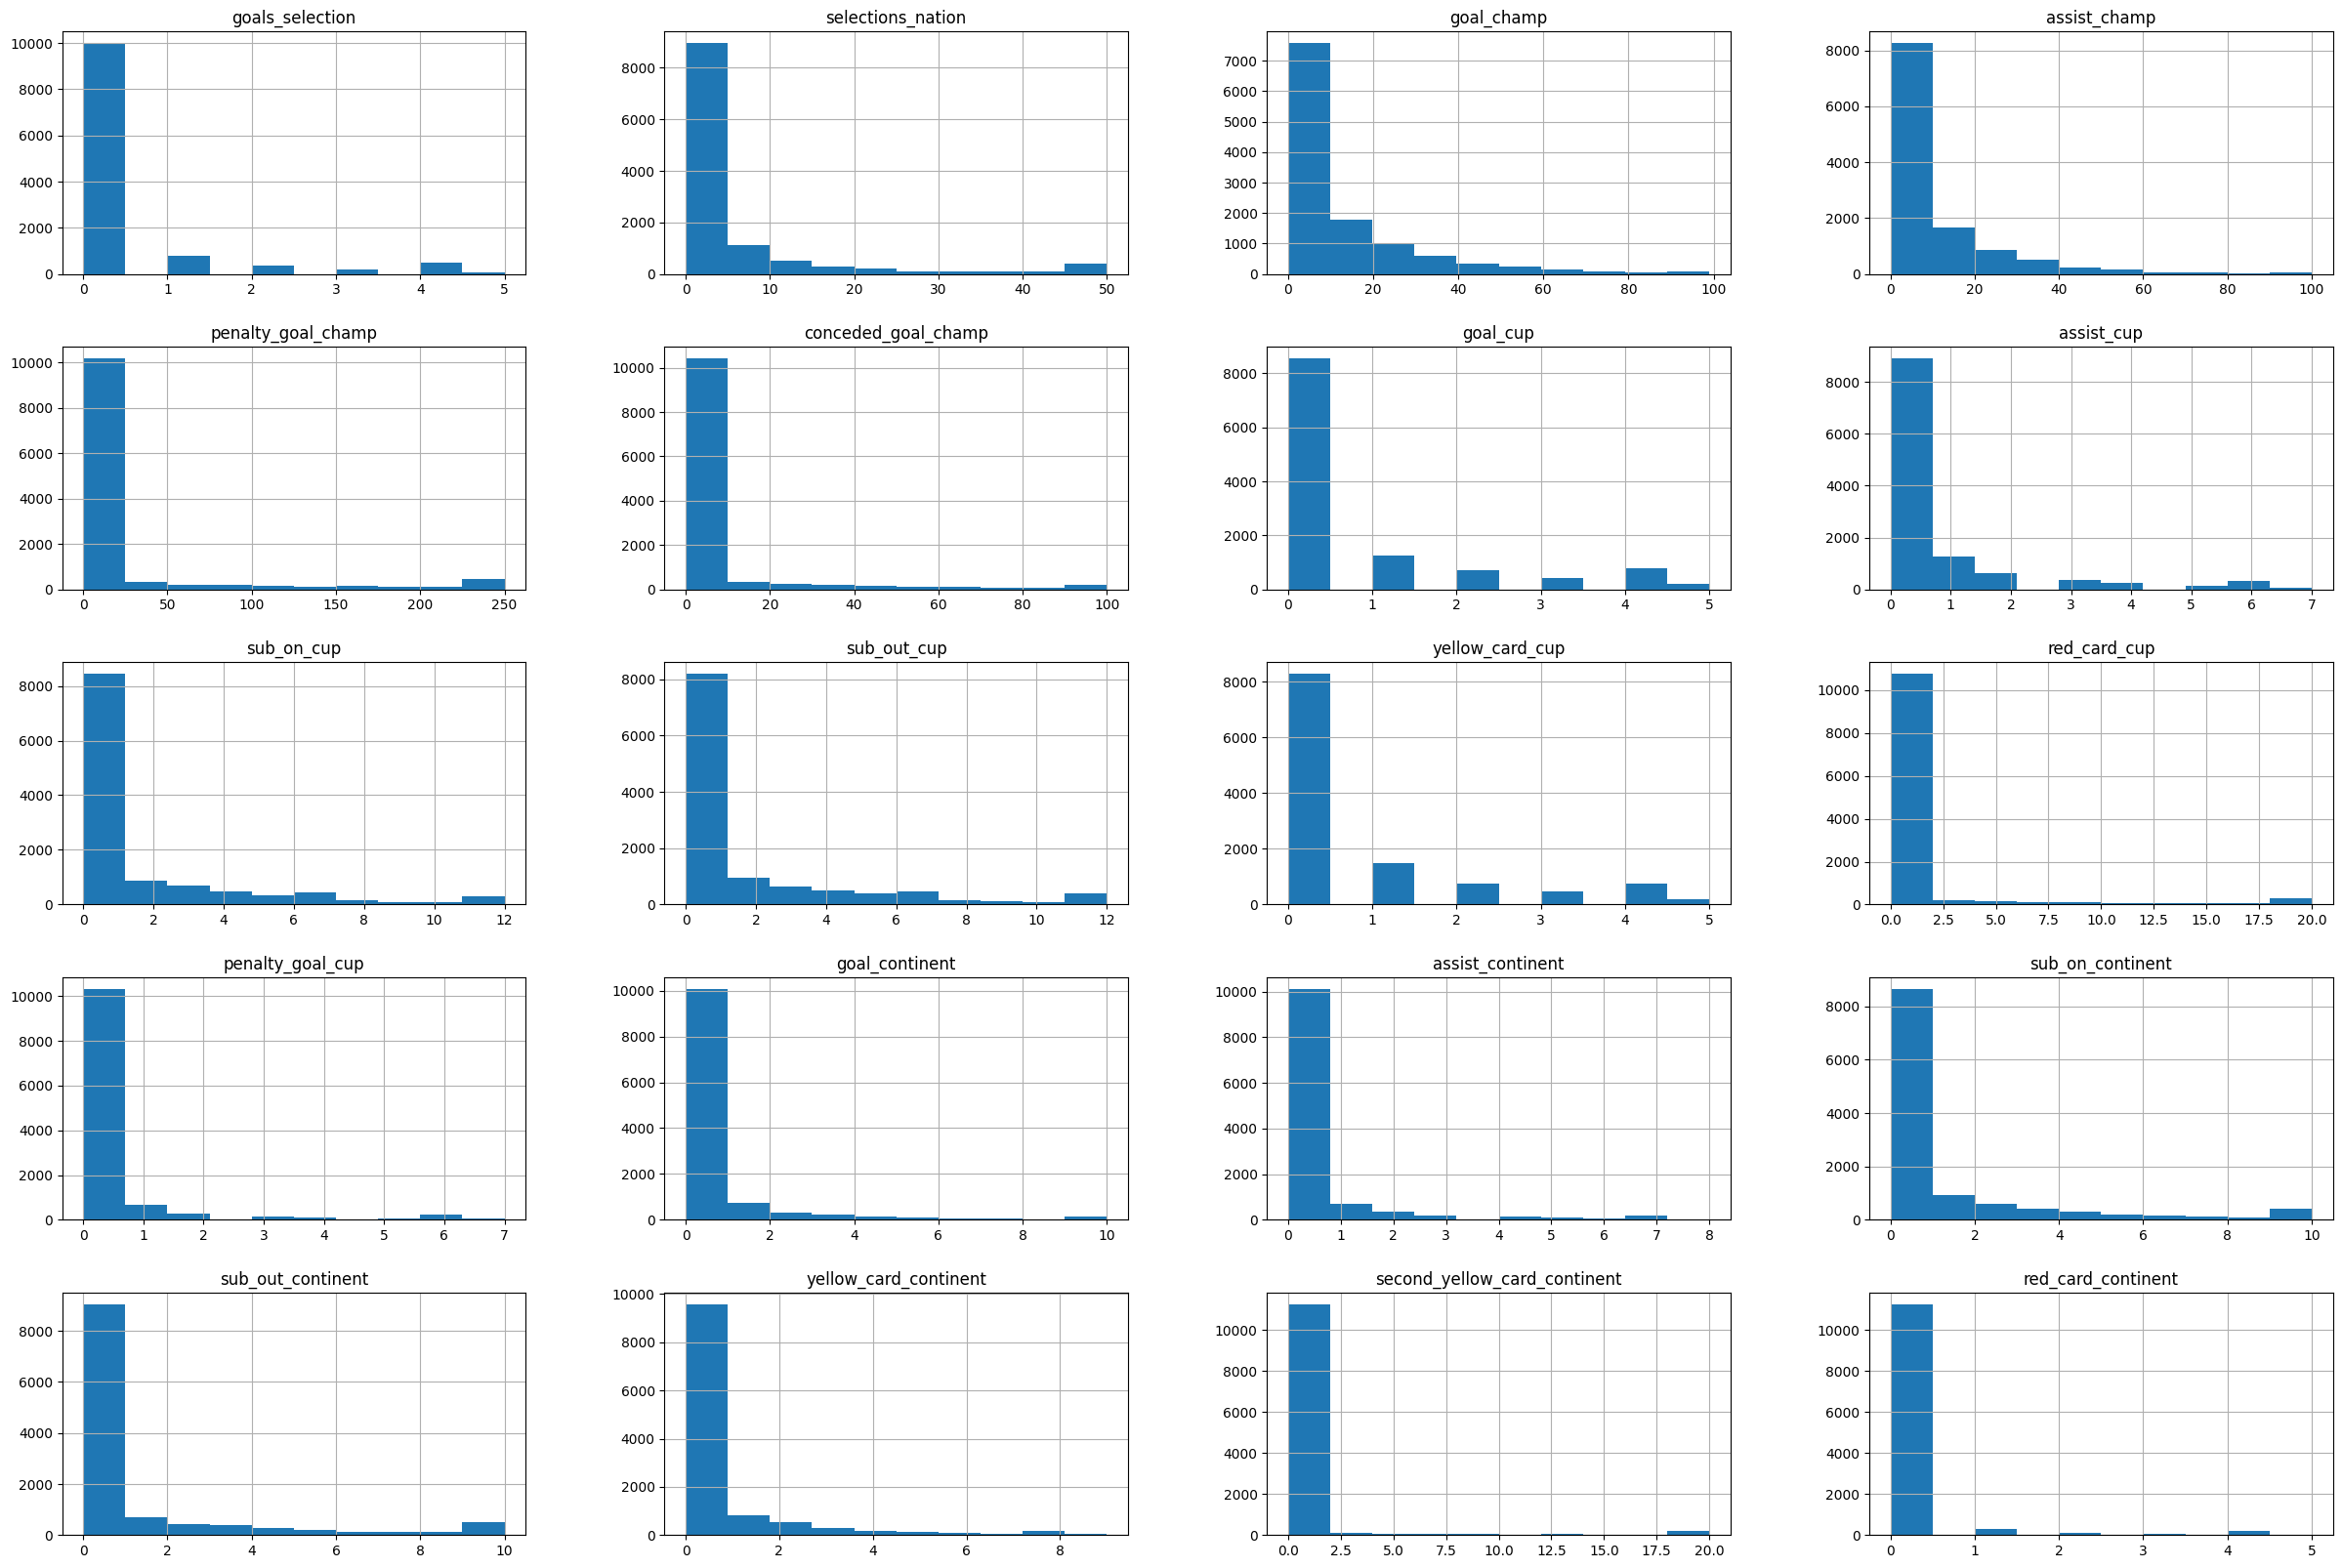

In [ ]:
footballData.hist([
'goals_selection',
'selections_nation',
'goal_champ',
'assist_champ',
'penalty_goal_champ',
'conceded_goal_champ',
'goal_cup',
'assist_cup',
'sub_on_cup',
'sub_out_cup',
'yellow_card_cup',
'red_card_cup',
'penalty_goal_cup',
'goal_continent',
'assist_continent',
'sub_on_continent',
'sub_out_continent',
'yellow_card_continent',
'second_yellow_card_continent',
'red_card_continent'], figsize=[30,20])

**Observations:**



*   The data is still is extremely skewed
*   However, many of the extreme values are removed so it should affect the prediction model a little less
*   Further analysis is required before final selection



# Step 11: Missing values analysis

Observing the number of missing values in the dataset. If the number of missing values in the column is more than 30%, then the column would be removed.

In [ ]:
footballData.isnull().sum()

age                                0
goals_selection                    0
selections_nation                  0
position                           0
price                              0
end_contract                    3962
goal_champ                         0
assist_champ                       0
own_goal_champ                     0
sub_on_champ                       0
sub_out_champ                      0
yellow_card_champ                  0
second_yellow_card_champ           0
red_card_champ                     0
penalty_goal_champ                 0
conceded_goal_champ                0
goal_cup                           0
assist_cup                         0
own_goal_cup                       0
sub_on_cup                         0
sub_out_cup                        0
yellow_card_cup                    0
second_yellow_card_cup             0
red_card_cup                       0
penalty_goal_cup                   0
goal_continent                     0
assist_continent                   0
o

In [ ]:
footballData.shape

(11920, 34)

**Observations:**


*   There are no missing values in any columns other than 'end_contract'.
*   'end_contract' has more than 30% of its data missing, therefore that column has to be removed.



In [ ]:
#removing end_contract
footballData.drop(columns=['end_contract'],inplace=True)

#observing the change in shape of the dataset
footballData.shape

(11920, 33)

# Step 12: Feature selection (attribute selection)

Observing the correlation between the target variable and the predictors to finalise attribute selection for the prediction model.
The correlation between the predictors and the target variable would be analysed both visually and statistically. To do that, first, the methods that should be used for the analysis should be chosen.

The relationships between target variable and it predictors in this dataset are:
* Continuous vs continuous
* Continuous vs categorical

To analyse the relationship between a continuous target variable and a continuous predictor, I am going to use a scatter plot to visualise the data distribution. I would also use Pearson's correlation coefficient to determine the strength of the relationship statistically.
To examine the correlation between a continuous target variable and a categorical predictor, I will use a box plot to visualise the data distribution. I will then perform ANOVA tests to further analyse the relationship between the variables.

# Relationship exploration: Continuous vs continuous (Scatter plots)

In [ ]:
#creating a list of all the continuous predictors
ContinuousCols=['age','goals_selection','selections_nation',
                  'goal_champ','assist_champ','sub_on_champ','sub_out_champ',
                  'yellow_card_champ','penalty_goal_champ','conceded_goal_champ',
                  'goal_cup','assist_cup','sub_on_cup','sub_out_cup',
                  'yellow_card_cup','red_card_cup','penalty_goal_cup',
                  'goal_continent','assist_continent','sub_on_continent',
                  'sub_out_continent','yellow_card_continent','second_yellow_card_continent',
                  'red_card_continent']

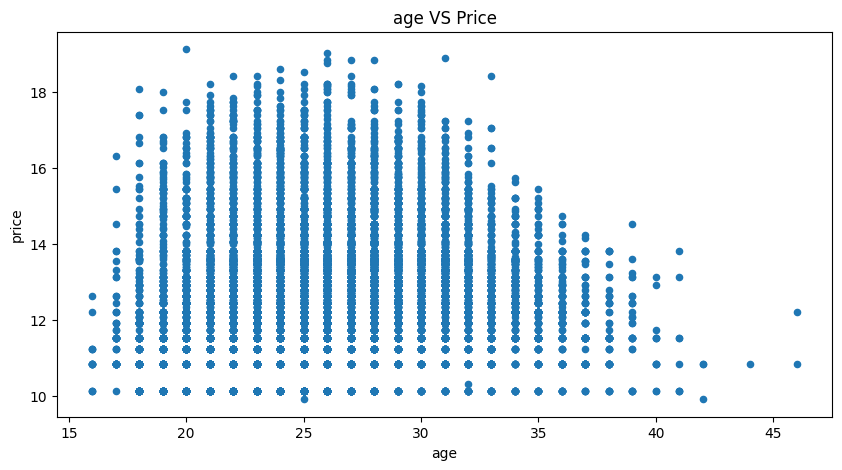

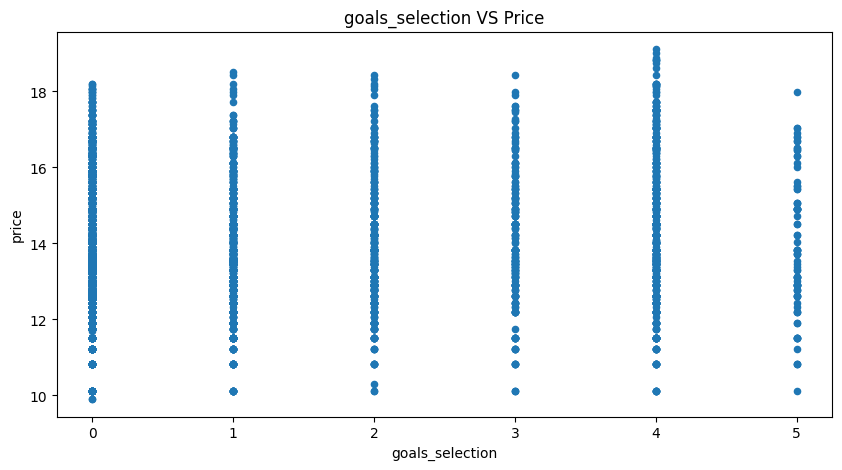

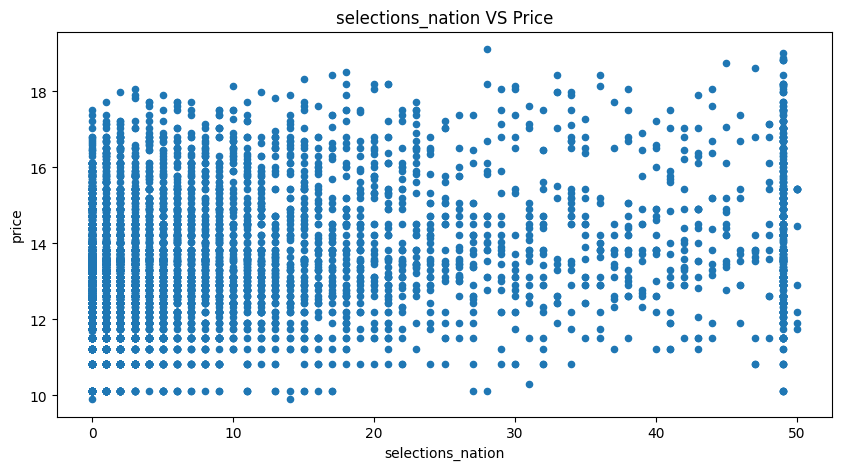

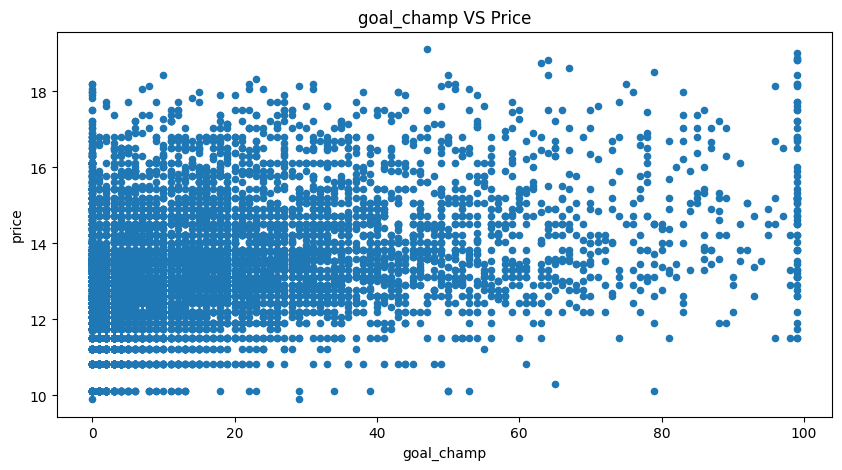

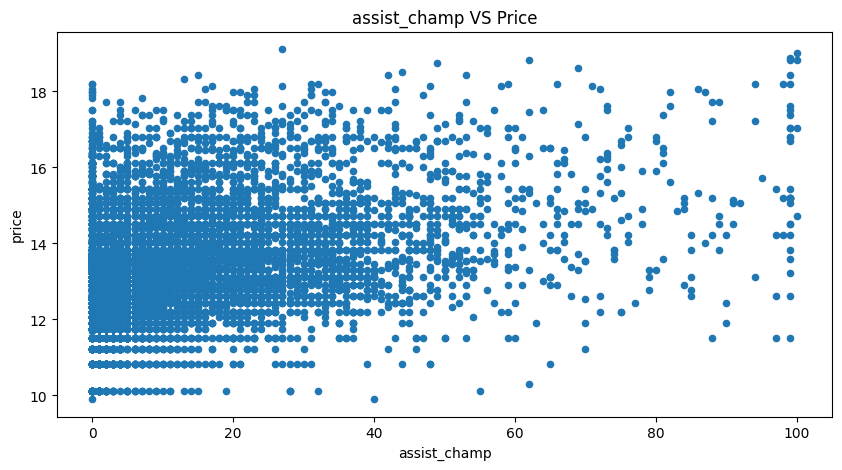

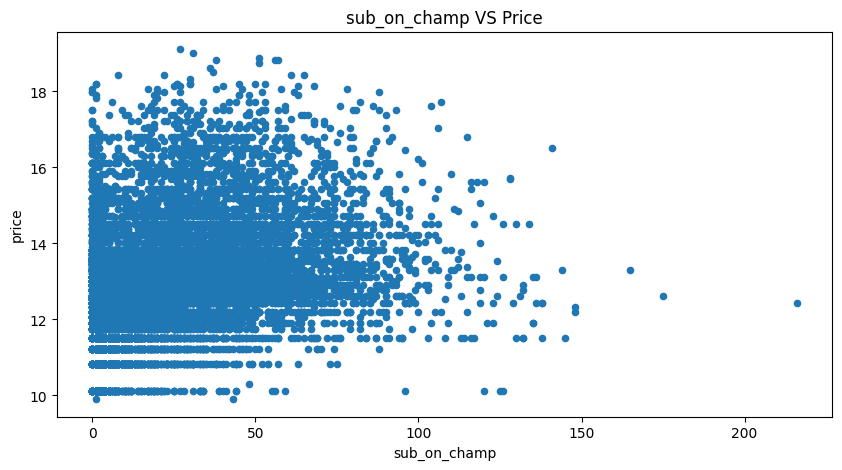

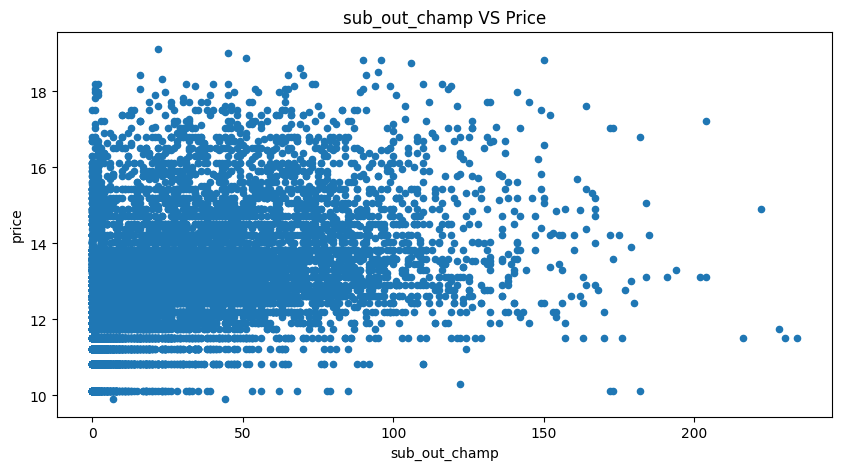

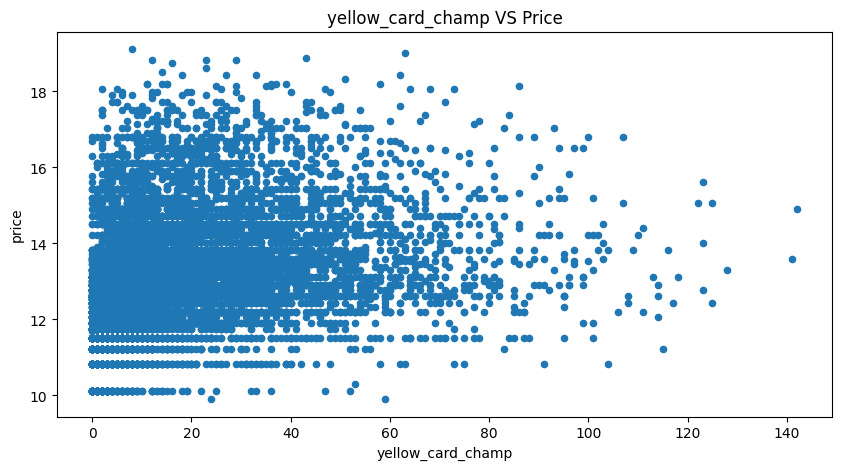

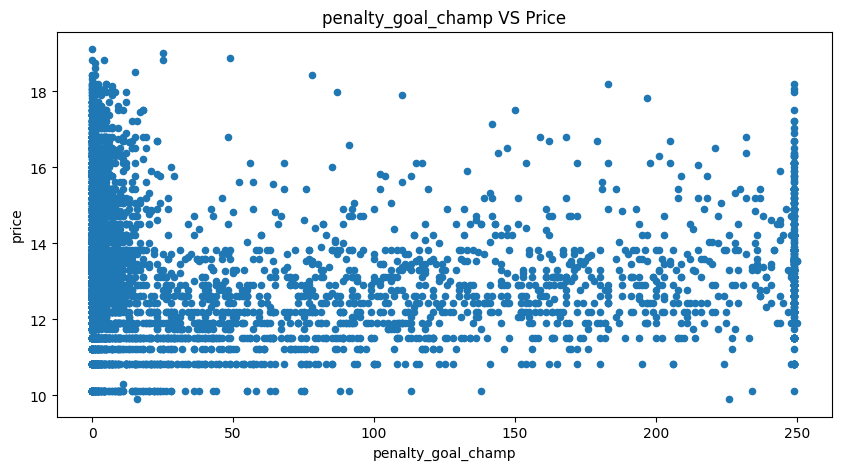

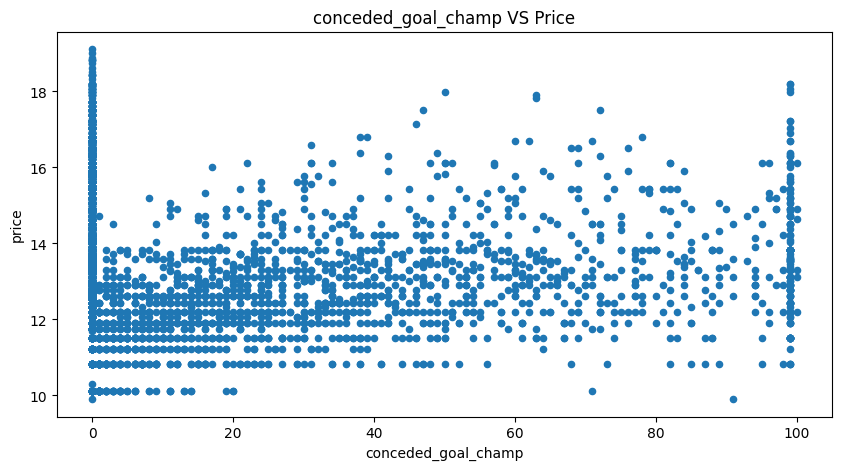

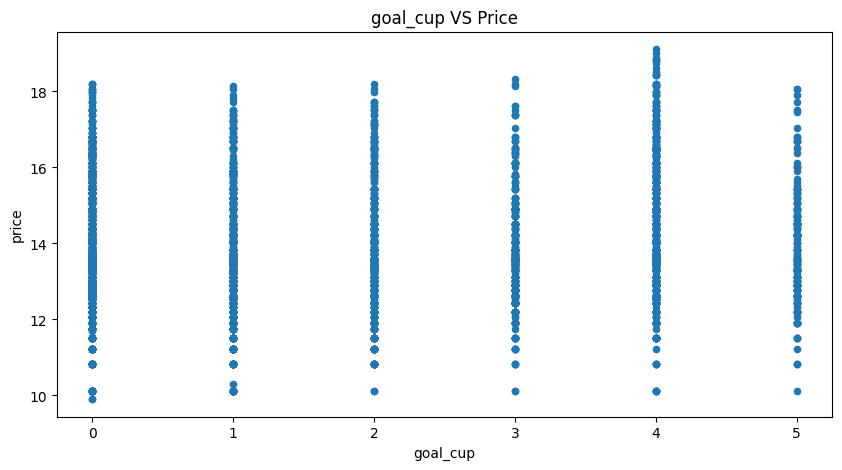

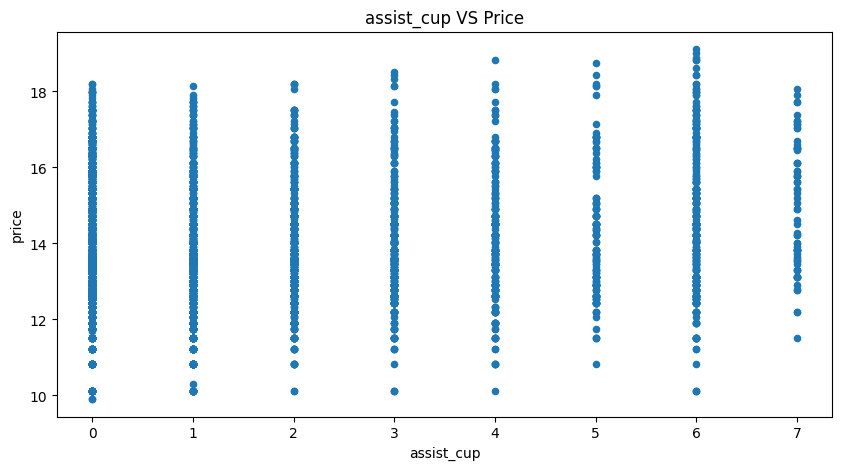

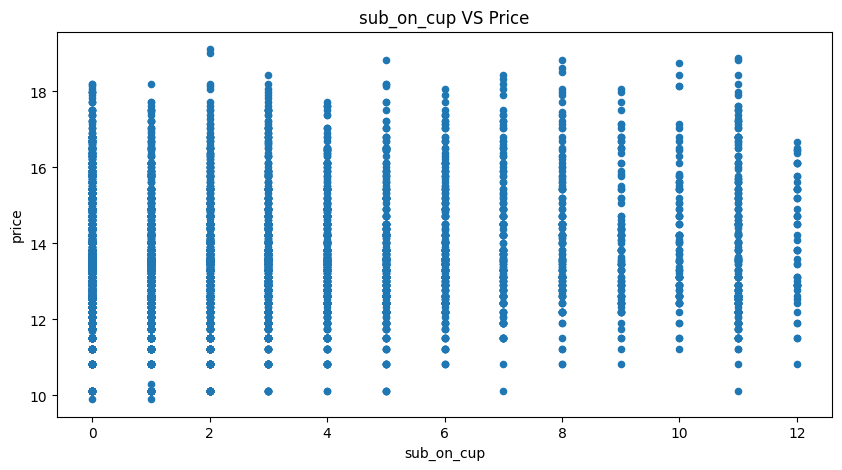

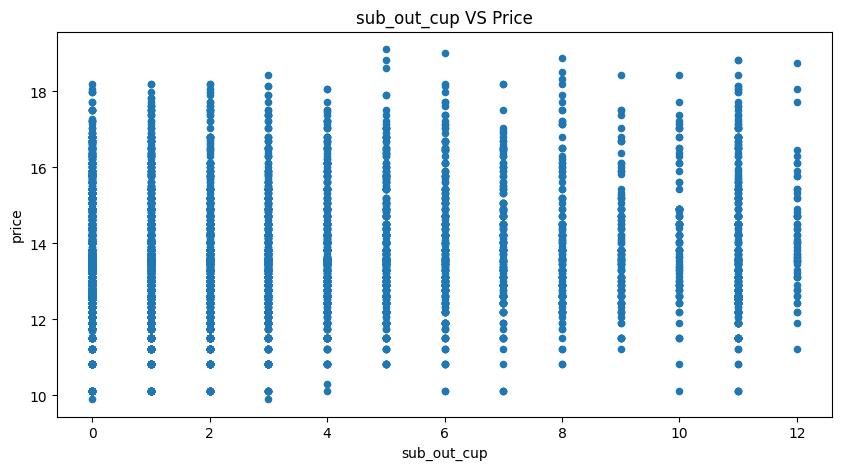

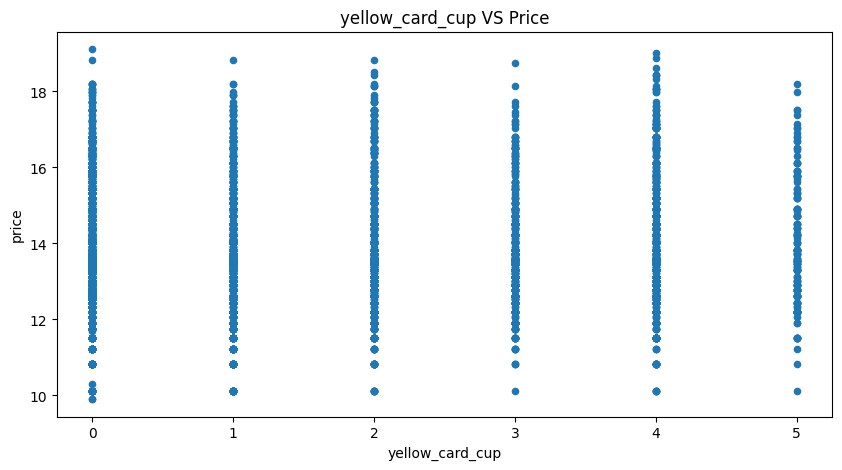

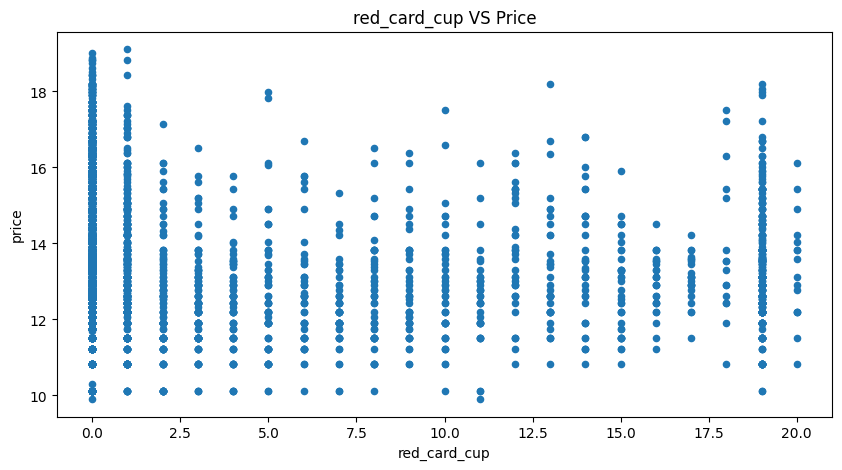

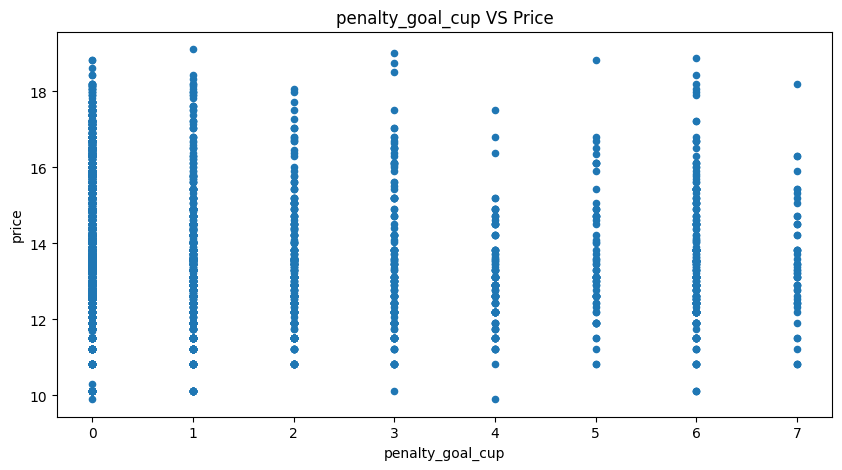

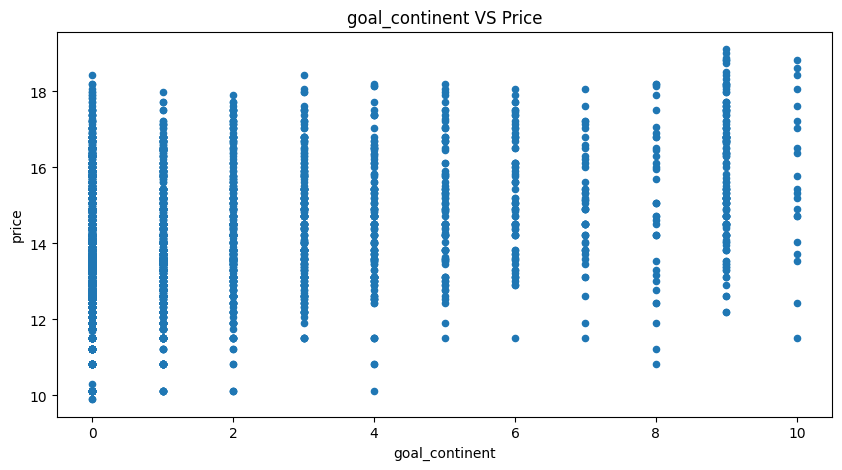

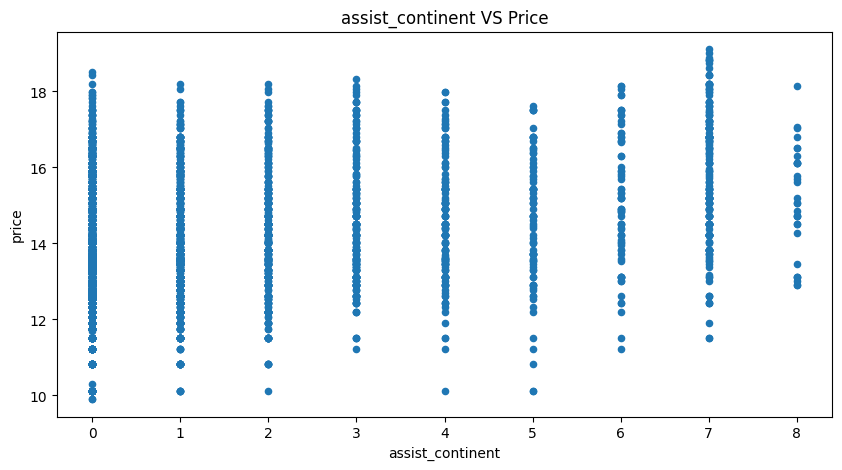

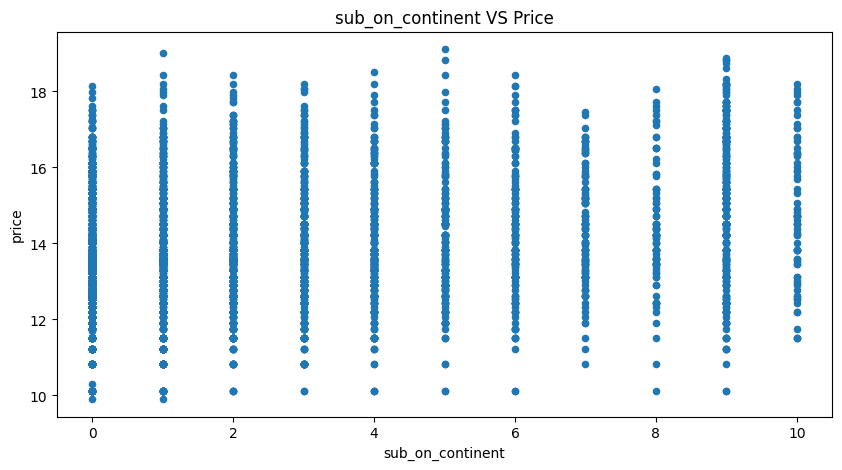

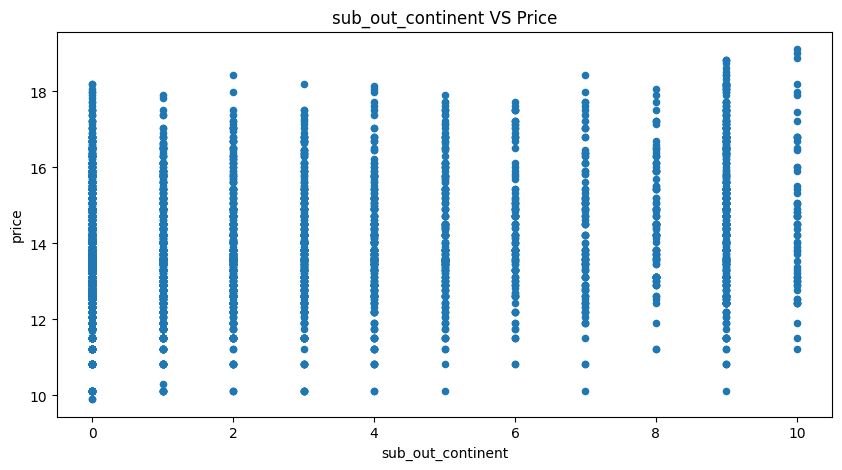

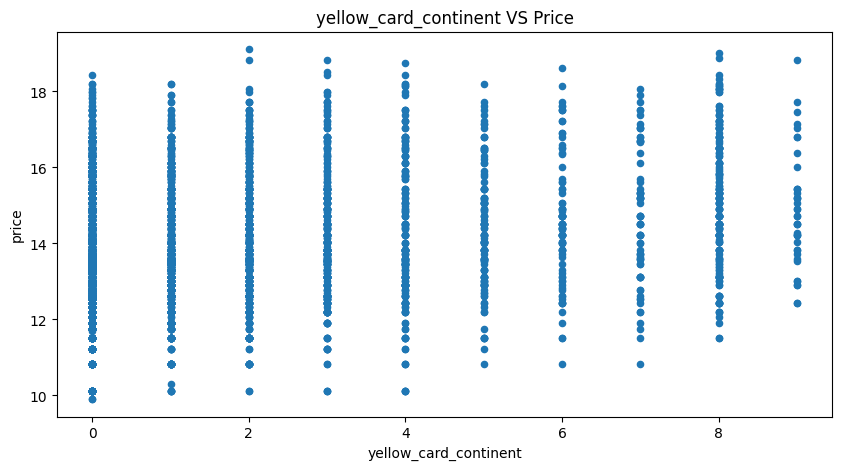

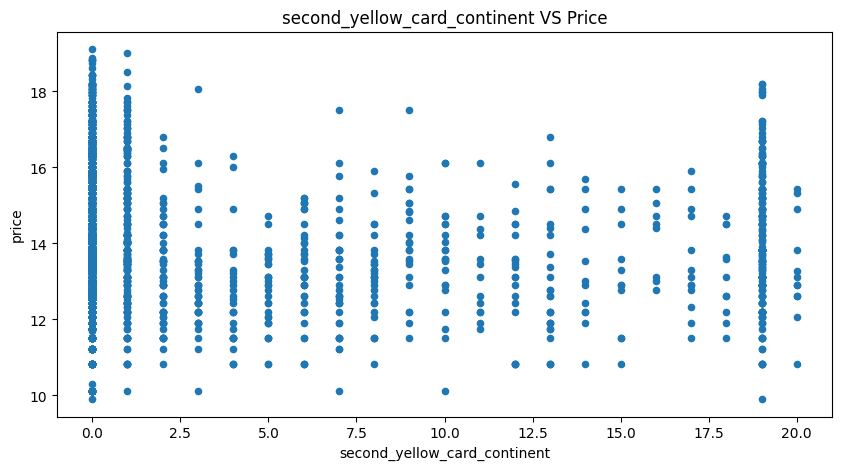

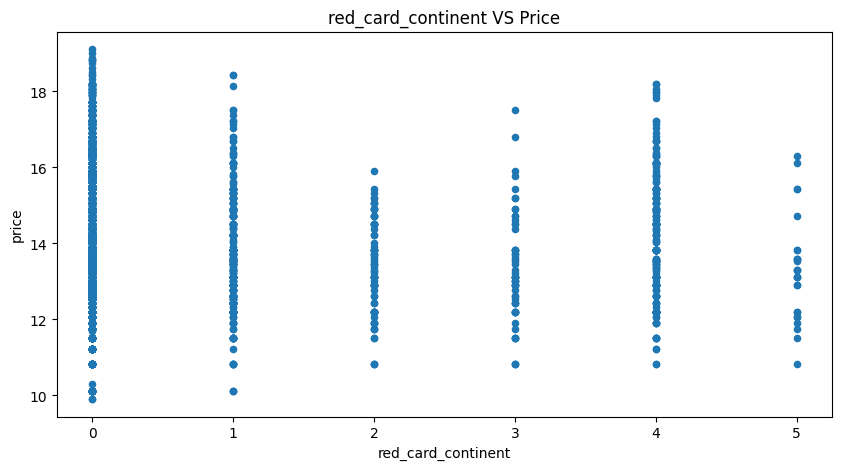

In [ ]:
#Plotting a scatter plot for each continuous predictor against the target variable
for predictor in ContinuousCols:
  footballData.plot.scatter(x=predictor, y='price', figsize=(10,5),
                          title=predictor+" VS "+'Price')

**Observations:**

The trends for each continuous predictor is as follows:



* age - Increasing but decreasing after 25
* goals_selection - no trend
* selections_nation - no trend
* goal_champ - no trend
* assist_champ - no obvious trend but the data is clustered between 0 and 40
* sub_on_champ - no obvious trend but the data is clustered between 0 and 100
* sub_out_champ - no obvious trend but the data is clustered between 0 and 100
* yellow_card_champ - no obvious trend but the data is clustered between 0 and 60
* penalty_goal_champ - no obvious trend but the data is clustered between 0 and 50 and then again at 250
* conceded_goal_champ - no obvious trend but there is clustering of data points at 0 and 100
* goal_cup - no trend
* assist_cup - no trend
* sub_out_cup - no trend
* yellow_card_cup - no trend
* red_card_cup - no trend
* penalty_goal_cup - no trend
* goal_continent - no trend
* assist_continent - no trend
* sub_on_continent - no trend
* sub_out_continent - no trend
* yellow_card_continent - no trend
* second_yellow_card_continent - no trend
* red_card_continent - no trend

Further analysis is required for the final selection.



# Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

The correlation between the continuous predictors and the target variable is examined through a correlation matrix which shows the Pearson's correlation coefficient for each relationship.

In [ ]:
#calculating correlation matrix
ContinuousCols = ['price','age','goals_selection','selections_nation',
                  'goal_champ','assist_champ','sub_on_champ','sub_out_champ',
                  'yellow_card_champ','penalty_goal_champ','conceded_goal_champ',
                  'goal_cup','assist_cup','sub_on_cup','sub_out_cup',
                  'yellow_card_cup','red_card_cup','penalty_goal_cup',
                  'goal_continent','assist_continent','sub_on_continent',
                  'sub_out_continent','yellow_card_continent','second_yellow_card_continent',
                  'red_card_continent']

In [ ]:
#creating the matrix and displaying it
CorrelationData = footballData[ContinuousCols].corr()
CorrelationData

,price,age,goals_selection,selections_nation,goal_champ,assist_champ,sub_on_champ,sub_out_champ,yellow_card_champ,penalty_goal_champ,conceded_goal_champ,goal_cup,assist_cup,sub_on_cup,sub_out_cup,yellow_card_cup,red_card_cup,penalty_goal_cup,goal_continent,assist_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent
price,1.000000,0.089300,0.312758,0.367042,0.454402,0.478688,0.388951,0.438481,0.409552,0.071770,0.082929,0.353871,0.353402,0.332433,0.344445,0.318667,0.054366,0.113590,0.410992,0.414691,0.430774,0.434539,0.391928,0.117639,0.139627
age,0.089300,1.000000,0.122648,0.260226,0.305219,0.317160,0.302435,0.379878,0.494291,0.310669,0.317600,0.198793,0.187781,0.182229,0.251108,0.240144,0.240066,0.264536,0.158739,0.169688,0.215825,0.223814,0.230206,0.202793,0.209058
goals_selection,0.312758,0.122648,1.000000,0.710962,0.448433,0.462148,0.319545,0.378840,0.247375,-0.119695,-0.119972,0.299242,0.316901,0.245573,0.262002,0.200978,-0.100435,-0.047417,0.411032,0.409381,0.342984,0.394278,0.338979,-0.069891,-0.047367
selections_nation,0.367042,0.260226,0.710962,1.000000,0.384162,0.441291,0.264050,0.349299,0.343824,0.044735,0.071694,0.260372,0.305479,0.230807,0.259900,0.237914,0.040503,0.093315,0.416052,0.426238,0.381913,0.419334,0.428255,0.121225,0.138123
goal_champ,0.454402,0.305219,0.448433,0.384162,1.000000,0.845806,0.662871,0.805293,0.521618,-0.206534,-0.215302,0.526401,0.471062,0.388070,0.424325,0.327924,-0.180751,-0.074435,0.525334,0.483799,0.422381,0.486144,0.373197,-0.130411,-0.098234
assist_champ,0.478688,0.317160,0.462148,0.441291,0.845806,1.000000,0.640690,0.805323,0.540520,-0.198859,-0.204112,0.513874,0.547384,0.426646,0.470616,0.366191,-0.170432,-0.068232,0.557566,0.573025,0.472649,0.546536,0.451260,-0.121931,-0.089374
sub_on_champ,0.388951,0.302435,0.319545,0.264050,0.662871,0.640690,1.000000,0.819892,0.524206,-0.296502,-0.282990,0.483621,0.422547,0.498531,0.487873,0.373803,-0.239052,-0.163309,0.346169,0.341874,0.451517,0.435932,0.315563,-0.175465,-0.142789
sub_out_champ,0.438481,0.379878,0.378840,0.349299,0.805293,0.805323,0.819892,1.000000,0.646785,-0.264466,-0.257264,0.504443,0.474220,0.474870,0.533295,0.411812,-0.218753,-0.131536,0.427652,0.428994,0.449296,0.514989,0.390913,-0.156438,-0.121155
yellow_card_champ,0.409552,0.494291,0.247375,0.343824,0.521618,0.540520,0.524206,0.646785,1.000000,-0.071056,-0.058102,0.329011,0.300963,0.317295,0.377839,0.508531,-0.081546,-0.013934,0.284400,0.305735,0.332841,0.388220,0.486060,-0.026100,0.004543
penalty_goal_champ,0.071770,0.310669,-0.119695,0.044735,-0.206534,-0.198859,-0.296502,-0.264466,-0.071056,1.000000,0.943331,-0.171888,-0.142518,-0.185651,-0.145128,-0.184274,0.681386,0.614058,-0.092705,-0.088723,-0.080493,-0.142484,-0.116544,0.559553,0.524926


In [ ]:
#filtering the columns where absolute correlation > 0.45 with 'price'
CorrelationData['price'][abs(CorrelationData['price'])>0.45]

price           1.000000
goal_champ      0.454402
assist_champ    0.478688
Name: price, dtype: float64

**Final selection of Continuous columns:**
* goal_champ      
* assist_champ     


# Step 14:Relationship exploration: Categorical Vs Continuous -- Box Plots

Visualising the relationship between the categorical variables and the target variable using box plots

In [ ]:
CategoricalColsList=['position','own_goal_champ',
               'second_yellow_card_champ', 'red_card_champ', 'own_goal_cup',
               'second_yellow_card_cup','own_goal_continent','penalty_goal_continent']

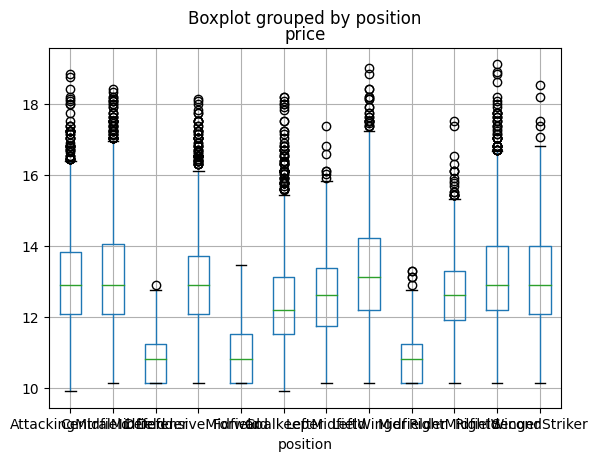

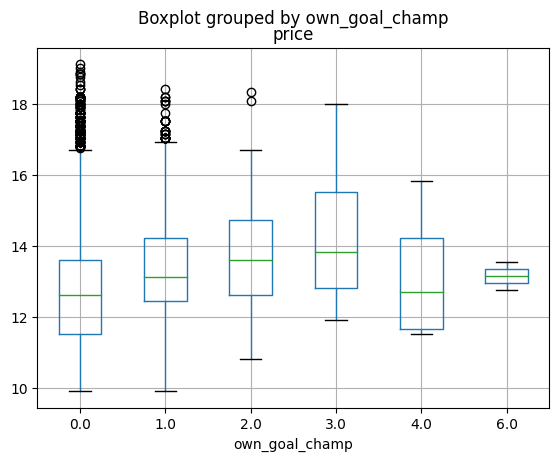

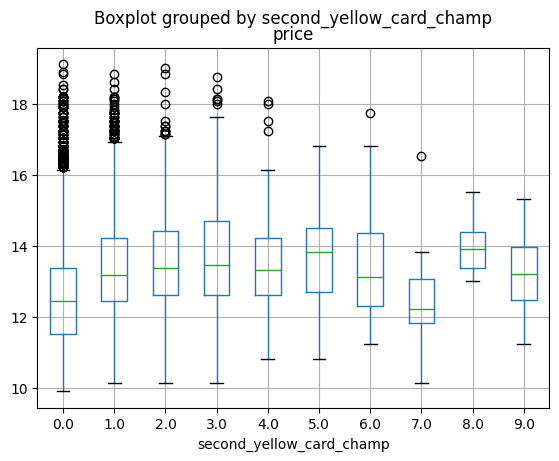

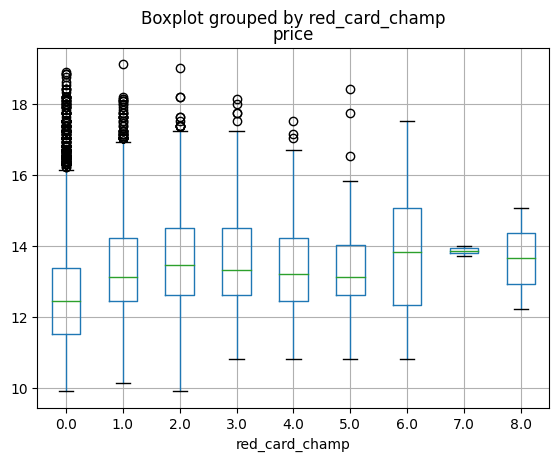

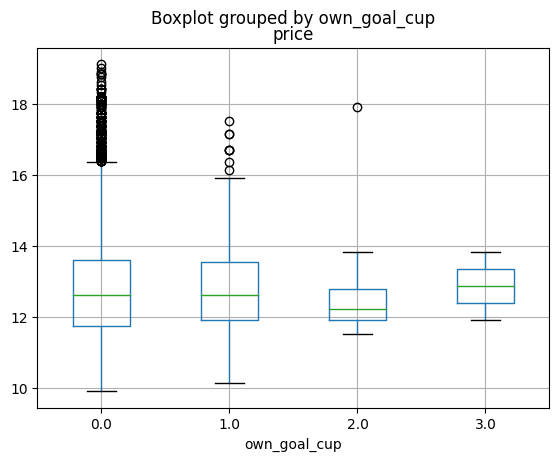

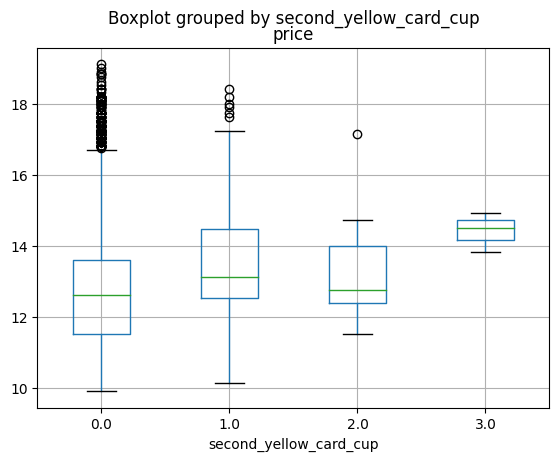

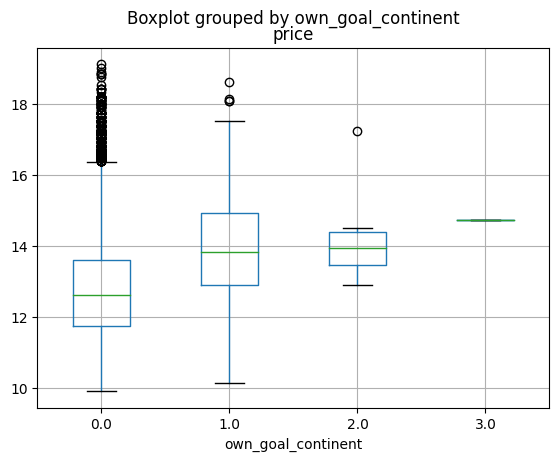

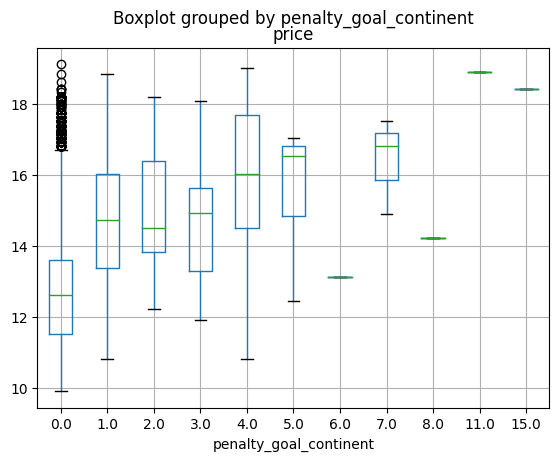

In [ ]:
import matplotlib.pyplot as plt

for PredictorCol in CategoricalColsList:
  footballData.boxplot(column='price', by=PredictorCol)

**Observations:**


*   Since the distribution is different for each category in each box plot, the distribution might be correlated with the target varible.
*   Further examination is required to finalise the predictors for the target variable.



# Step 15: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

ANOVA tests are performed to analyse the statistical relationship between the categorical predictors and the target variable

In [ ]:
#defining a function to find the statistical relationship between all the categorical predictors
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  #creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    #If the ANOVA P-value is <0.05, that means we reject H0
    if (AnovaResults[1]<0.05):
     print(predictor, 'is correlated with', TargetVariable, '| P-Value: ', AnovaResults[1])
     SelectedPredictors.append(predictor)
    else:
       print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value: ', AnovaResults[1])

  return (SelectedPredictors)


In [ ]:
#calling the function to check which categorical variables are correlated with 'Price'
CategoricalPredictorList=['position','own_goal_champ',
               'second_yellow_card_champ', 'red_card_champ', 'own_goal_cup',
               'second_yellow_card_cup','own_goal_continent','penalty_goal_continent']
FunctionAnova(inpData = footballData,
              TargetVariable = 'price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

position is correlated with price | P-Value:  0.0
own_goal_champ is correlated with price | P-Value:  4.4642584692113306e-43
second_yellow_card_champ is correlated with price | P-Value:  1.498736968377239e-187
red_card_champ is correlated with price | P-Value:  2.7821503411039396e-167
own_goal_cup is NOT correlated with price | P-Value:  0.9756667389402185
second_yellow_card_cup is correlated with price | P-Value:  1.8010377316659853e-16
own_goal_continent is correlated with price | P-Value:  2.635443412782917e-12
penalty_goal_continent is correlated with price | P-Value:  1.1153449696504908e-110


['position',
 'own_goal_champ',
 'second_yellow_card_champ',
 'red_card_champ',
 'second_yellow_card_cup',
 'own_goal_continent',
 'penalty_goal_continent']

Final selection of Categorical columns:

* 'position',
* 'own_goal_champ',
* 'second_yellow_card_champ',
* 'red_card_champ',
* 'second_yellow_card_cup',
* 'own_goal_continent',
* 'penalty_goal_continent'




# Selecting final Predictors/Features for building Machine Learning/AI model.

The final predictors for the machhine learning model are:
* position
* own_goal_champ
* second_yellow_card_champ
* red_card_champ
* second_yellow_card_cup
* own_goal_continent
* penalty_goal_continent
* goal_champ      
* assist_champ   

In [ ]:
#creating a list of all the selected columns
SelectedColumns=['position',
'own_goal_champ',
'second_yellow_card_champ',
'red_card_champ',
'second_yellow_card_cup',
'own_goal_continent',
'penalty_goal_continent',
'goal_champ',
'assist_champ',
]

In [ ]:
#selecting final columns
DataForML = footballData[SelectedColumns]
DataForML.head()

,position,own_goal_champ,second_yellow_card_champ,red_card_champ,second_yellow_card_cup,own_goal_continent,penalty_goal_continent,goal_champ,assist_champ
0,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RightWinger,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2,RightWinger,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.0
3,SecondStriker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AttackingMidfield,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
#saving this final data subset for refernce during deployment
DataForML.to_pickle('DataForML.pkl')

# Step 16:Data Pre-processing for Machine Learning Model Building or Model Development

Preprocessing all the data before for building the machine learning model. Converting the categorical variables to numeric form.

# Converting the nominal variable to numeric using get_dummies()

In [ ]:
#treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

In [ ]:
#adding target variable to the data
DataForML_Numeric['price'] = footballData['price']

In [ ]:
#printing sample rows
DataForML_Numeric.head()

,own_goal_champ,second_yellow_card_champ,red_card_champ,second_yellow_card_cup,own_goal_continent,penalty_goal_continent,goal_champ,assist_champ,position_AttackingMidfield,position_CentralMidfield,position_Defender,position_DefensiveMidfield,position_Forward,position_Goalkeeper,position_LeftMidfield,position_LeftWinger,position_Midfielder,position_RightMidfield,position_RightWinger,position_SecondStriker,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,15.201805
1,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,False,False,False,False,False,False,False,False,False,False,True,False,13.592367
2,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.0,False,False,False,False,False,False,False,False,False,False,True,False,13.384728
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,10.819778
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,12.206073


# Step 17: Machine Learning Model Development

Creating a training and testing set from the dataset for the prediction model

In [ ]:
#printing all the column names
DataForML_Numeric.columns

Index(['own_goal_champ', 'second_yellow_card_champ', 'red_card_champ',
       'second_yellow_card_cup', 'own_goal_continent',
       'penalty_goal_continent', 'goal_champ', 'assist_champ',
       'position_AttackingMidfield', 'position_CentralMidfield',
       'position_Defender', 'position_DefensiveMidfield', 'position_Forward',
       'position_Goalkeeper', 'position_LeftMidfield', 'position_LeftWinger',
       'position_Midfielder', 'position_RightMidfield', 'position_RightWinger',
       'position_SecondStriker', 'price'],
      dtype='object')

In [ ]:
#separate target variable and predictor variables
TargetVariable = 'price'
Predictors = ['own_goal_champ', 'second_yellow_card_champ',
       'red_card_champ', 'second_yellow_card_cup', 'own_goal_continent',
       'penalty_goal_continent','position_AttackingMidfield', 'position_CentralMidfield',
       'position_Defender', 'position_DefensiveMidfield', 'position_Forward',
       'position_Goalkeeper', 'position_LeftMidfield', 'position_LeftWinger',
       'position_Midfielder', 'position_RightMidfield', 'position_RightWinger',
       'position_SecondStriker']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

#split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 18: Standardization/Normalization of data

Normalisating the data to ensure that everything is evenly scaled.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8344, 18)
(8344,)
(3576, 18)
(3576,)


# Step 19: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.2219918801993903

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000                 0.0                     0.0   

   position_AttackingMidfield  position_CentralMidfield  position_Defende

# Decision tree regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.20820493289544284

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000                 0.0                     0.0   

   position_AttackingMidfield 

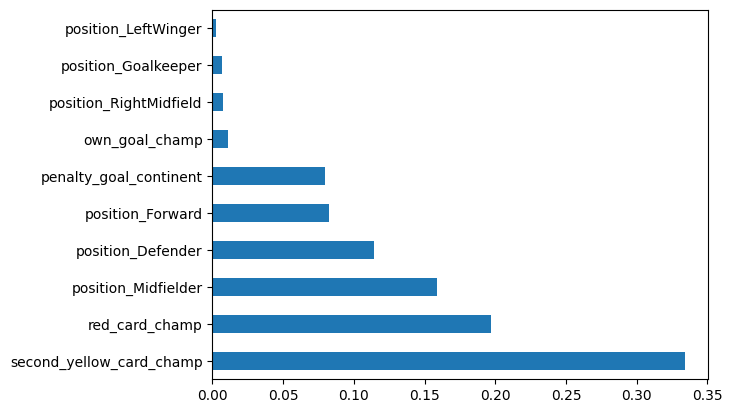

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20
# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
# Plotting the feature importance for Top 10 mostimportant columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
# Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100* (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

# Plotting/visualising the decision tree

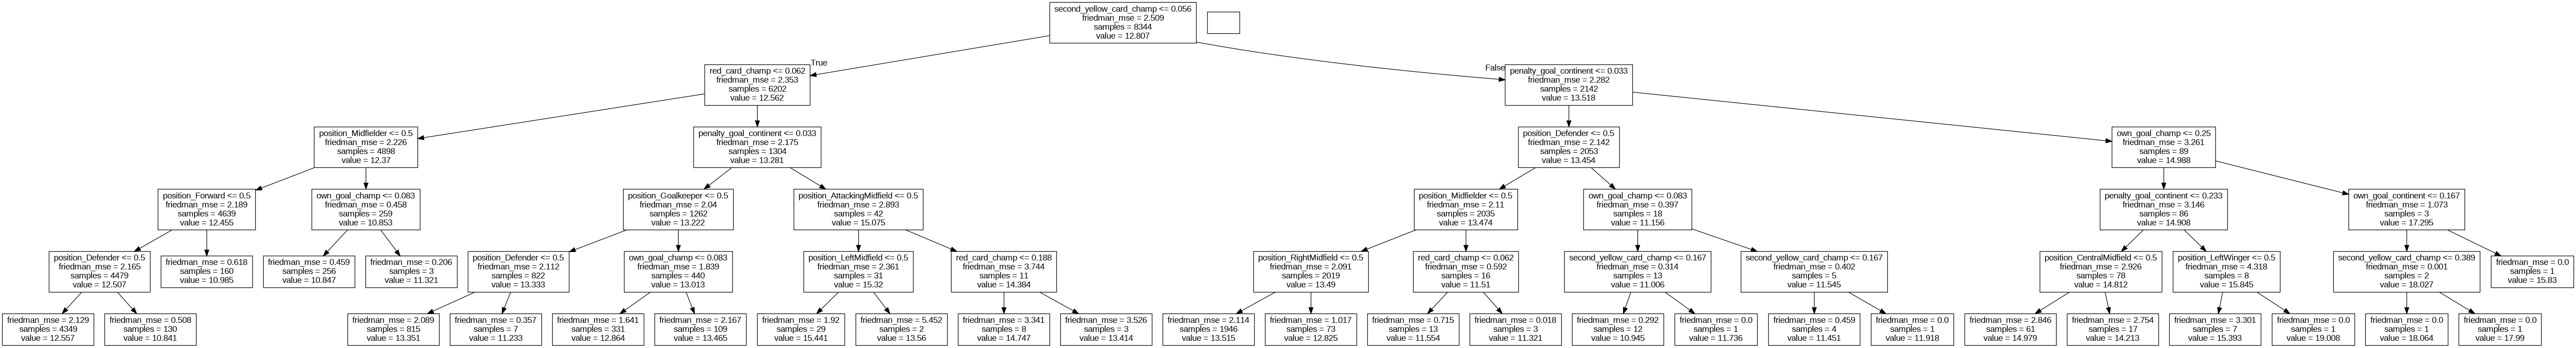

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,feature_names=Predictors, class_names=TargetVariable)
# printing the rules
#print(dot_data)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random forest regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.19971980591077998

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000                 0.0                     0.0   

   position_

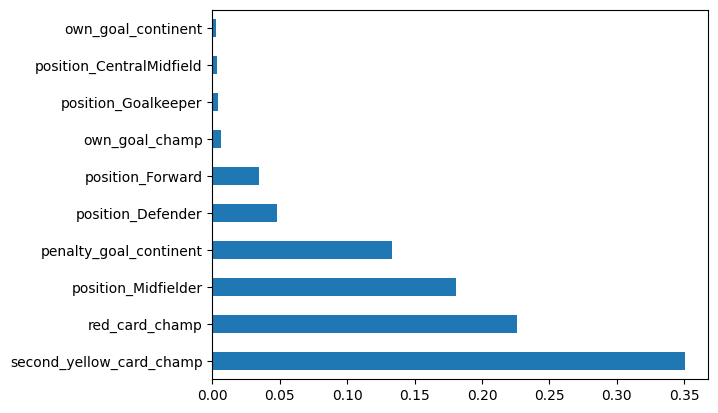

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting one of the decision tree in random forest regressor

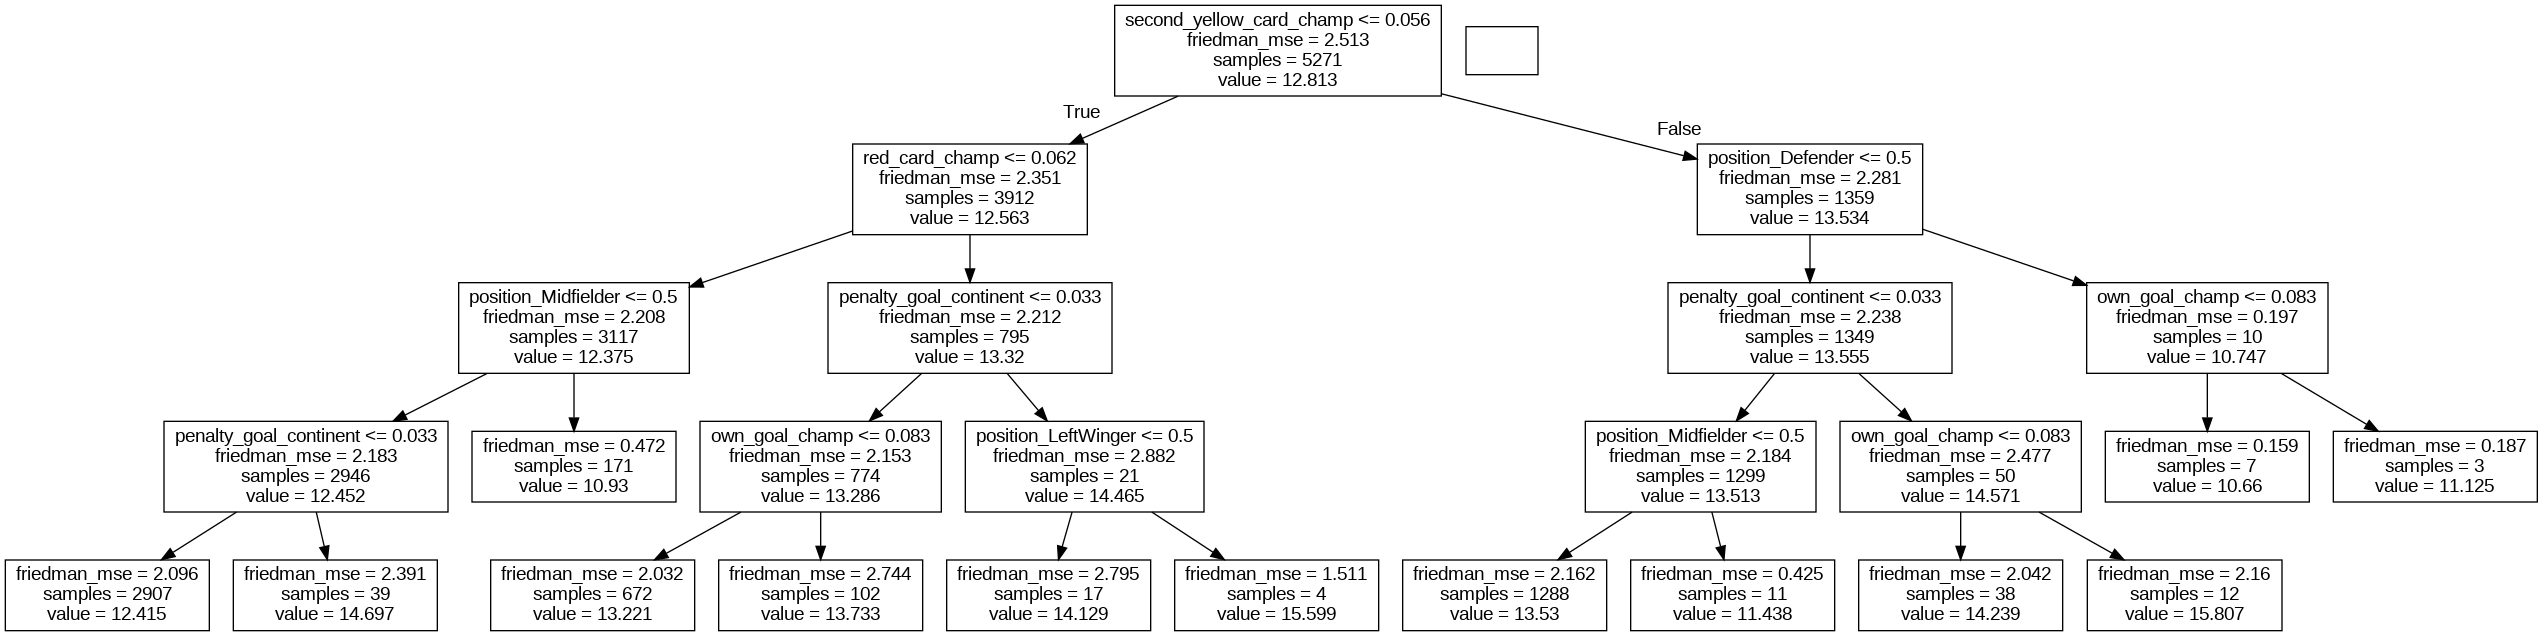

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Step 20 - AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.16308540190705623

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000               

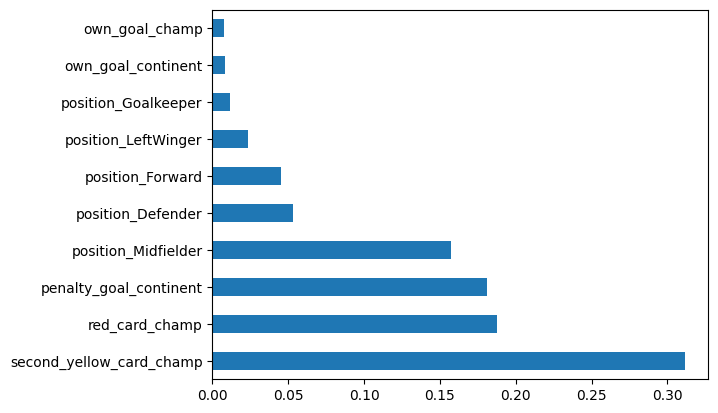

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
# Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100* (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

# XG boost regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.2750300659815038

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0               

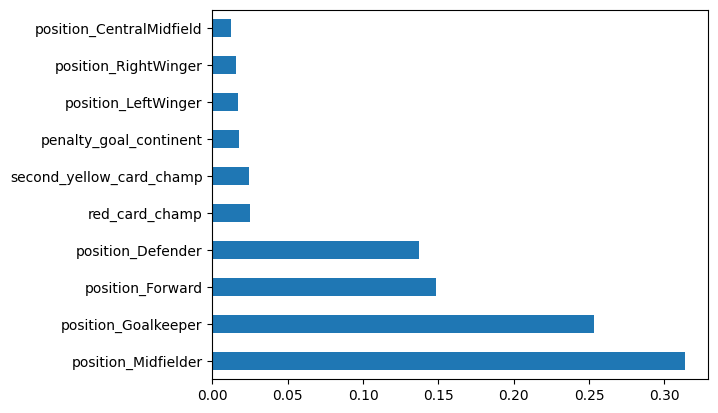

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,objective='reg:linear',booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print ('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
# Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100* (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

# Plotting a single Decision tree out of XGBoost

<Axes: >

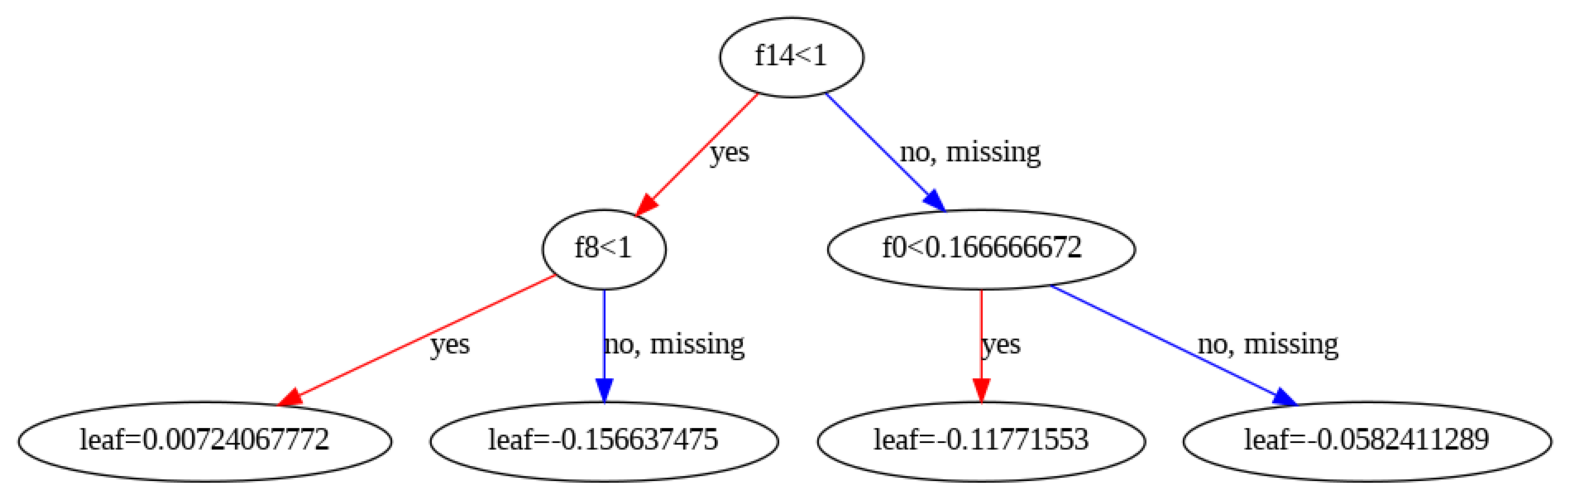

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.08663784920032735

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000                 0.0                     0.0   

   position_AttackingMidfield  position_CentralMidfield 

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.21035675161278233

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   second_yellow_card_cup  own_goal_continent  penalty_goal_continent  \
0                0.000000                 0.0                     0.0   
1                0.000000                 0.0                     0.0   
2                0.000000                 0.0                     0.0   
3                0.333333                 0.0                     0.0   
4                0.000000                 0.0                     0.0   

   position_AttackingMidfield  position_CentralMidfield  position_Def

# Step 21: Model Deployment

The Support Vector Machine (SVM) Regressor has the highest accuracy and therefore, it would be the model used for deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['second_yellow_card_champ','red_card_champ','position_Midfielder']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(11920, 3)
(11920,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.26642484 93.24957343 92.37600016 88.12699971 91.2825378  93.40747081
 93.60619844 91.69727195 90.06309025 90.28580412]

Final Average Accuracy of the model: 91.14


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_SVM_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone_project_2024


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['second_yellow_card_champ','red_card_champ','position_Midfielder']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[1,0,1],[0,1,1]],
                           columns=['second_yellow_card_champ', 'red_card_champ', 'position_Midfielder'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   second_yellow_card_champ  red_card_champ  position_Midfielder
0                         1               0                    1
1                         0               1                    1


,Prediction
0,10.992552
1,10.968124


# Conclusion




*   The python function that was created - FunctionPredictionResult can be called anywhere to deploy the prediction model to get the results.
*   The predicted price need to be transformed using the exponential function to get the actual price since the price column was transformed at the start to reduce the skewness of the data.

